In [1]:
import matplotlib.pyplot as plt
import numpy as np
from constants import SIMULATION_MAGNETON
from helper_tools import *

from storage_ring_modeler import StorageRingModel,make_optimal_solution_model
from particle_class import Swarm
from particle_tracer_lattice import ParticleTracerLattice
from typing import Union
from particle_class import Particle
from particle_tracer import ParticleTracer
from field_generators import HalbachLens,HalbachBender,Collection
import time
from swarm_tracer import SwarmTracer
from particle_tracer_lattice import ParticleTracerLattice
from typing import Union
from particle_class import Particle
from particle_tracer import ParticleTracer
from field_generators import HalbachLens,HalbachBender,Collection
import time
import random
from swarm_tracer import SwarmTracer

In [2]:
np.random.seed(42)
PTL=ParticleTracerLattice(use_mag_errors=False,include_mag_cross_talk=False)
PTL.add_halbach_lens_sim(.05,.2)
PTL.add_segmented_halbach_bender(.0254/2.0,.01,100,1.0)
PTL.add_drift(.1)
PTL.end_lattice()
pt=ParticleTracer(PTL)
np.set_printoptions(precision=100)
particle=Particle(qi=np.array([-1e-10,1e-3,1e-3]))
particle=pt.trace(particle,1e-6,1.0)
print(repr(particle.qf))

array([-1.2107965837946268e+00,  8.3687721871141496e-01,
        5.0336093333975342e-05])


In [2]:
np.random.seed(42)
PTL=ParticleTracerLattice(use_mag_errors=False,include_mag_cross_talk=False)
PTL.add_halbach_lens_sim(.05,.2)
PTL.add_segmented_halbach_bender(.0254/2.0,.01,100,1.0)
PTL.add_drift(.1)
PTL.end_lattice()
pt=ParticleTracer(PTL)
np.set_printoptions(precision=100)
particle=Particle(qi=np.array([-1e-10,1e-3,1e-3]))
particle=pt.trace(particle,1e-6,1.0)
print(repr(particle.qf))

0.016472228791130562
0.009722472309102623
0.009722472309102623
array([-1.2106420220368315e+00,  8.3523320737601026e-01,
        7.0745497726402791e-05])


In [ ]:
"""
rotated, but should be the same
array([-1.2106592060663823e+00,  8.3533371261255085e-01,
        7.0189350424691558e-05])

[9.9925188281143505e+02 3.8673953738943574e+01 8.5873427788526633e-15]
[9.970086506043959e+02 7.729004217880342e+01 1.716183688023141e-14]
[9.970086506043959e+02 7.729004217880342e+01 1.716183688023141e-14]
"""

In [ ]:
"""
original:
results: array([-1.2106420220368315e+00,  8.3523320737601026e-01,
        7.0745497726402791e-05])

positions:
[9.9925188281143494e+02 3.8673953738943574e+01 8.5873427788526633e-15]
[9.970086506043958e+02 7.729004217880342e+01 1.716183688023141e-14]
[9.970086506043958e+02 7.729004217880342e+01 1.716183688023141e-14]
"""

In [2]:
np.random.seed(42)
t=time.time()
model=make_optimal_solution_model('2',use_bumper=False,build_field_helpers=False,use_mag_errors=False,include_mag_cross_talk=True)
print(time.time()-t)
t=time.time()
model.build_field_helpers_if_unbuilt(parallel=True)
print(time.time()-t)
t=time.time()
print(model.mode_match(parallel=True))
print(time.time()-t)

16.64372992515564
595.010015964508
(0.8792229967038492, 307.15782475453267)
196.70670199394226


In [3]:
# np.random.seed(42)
# t=time.time()
# model=make_optimal_solution_model('2',use_bumper=False,build_field_helpers=False,use_mag_errors=True,include_mag_cross_talk=False)
# print(time.time()-t)
# t=time.time()
# model.build_field_helpers_if_unbuilt(parallel=True)
# print(time.time()-t)
# t=time.time()
# print(model.mode_match(parallel=True))
# print(time.time()-t)

14.84503698348999


/Users/williamdebenham/Desktop/storageRingPrevious/storageRing/storageRingModel/particle_tracer_lattice.py:277: UserWarning: Using parallel==True with magnet errors will not produce the same results as with parallel==False
  warnings.warn(


613.5229890346527
(0.988822703605898, 28.46070885625252)
114.35867619514465


In [4]:
np.random.seed(42)
PTL=ParticleTracerLattice(use_mag_errors=True,include_mag_cross_talk=True)
PTL.add_halbach_lens_sim(.05,.2)
PTL.add_halbach_lens_sim(.05,.2)
PTL.end_lattice(parallel=True)
print(np.random.random())

0.9699098521619943


In [6]:
"""
15.01213526725769
61.86362600326538
(0.8696893904877981, 331.8094275610885)
85.38829898834229
"""

'\n15.01213526725769\n61.86362600326538\n(0.8696893904877981, 331.8094275610885)\n85.38829898834229\n'

In [7]:
swarm=model.swarm_tracer_ring.initalize_pseudorandom_swarm_in_phase_space(1e-3,3.0,1.0,100)
swarm_traced=model.swarm_tracer_ring.trace_swarm_through_lattice(swarm,5e-6,10.0,parallel=True,use_fast_mode=False)

In [21]:
lens=model.lattice_ring[0]

KeyError: 'is_coord_in_vacuum'

In [10]:
for i,el in enumerate(model.lattice_injector):
    print(i)
    el.is_coord_inside(np.array([1,1,1]))

0
1
2
3
4
5
6


In [19]:
model.swarm_tracer_injector.lattice[5].is_coord_inside(np.array([1,1,1]))

False

In [ ]:
t=time.time()
model=make_optimal_solution_model('2',use_bumper=False,build_field_helpers=False,use_mag_errors=False)
print(time.time()-t)
t=time.time()
model.build_field_helpers_if_unbuilt(parallel=True)
print(time.time()-t)
t=time.time()
print(model.mode_match(parallel=True))
print(time.time()-t)

In [5]:
t=time.time()
model=make_optimal_solution_model('2',use_bumper=False,build_field_helpers=False,use_mag_errors=True)
print(time.time()-t)
t=time.time()
model.build_field_helpers_if_unbuilt(parallel=True)
print(time.time()-t)

15.115011930465698
17.78971791267395


In [18]:
import random
random.seed(a=1)
random.random(),np.random.random()

(0.13436424411240122, 0.9981509891164713)

In [2]:
t=time.time()
PTL=ParticleTracerLattice()
PTL.add_segmented_halbach_bender(.0254/2.0,.01,100,1.0)
PTL.add_drift(.01)
PTL.end_lattice()
print(time.time()-t)
particle=Particle(qi=np.array([-1e-10,3e-3,0.0]))
particle=ParticleTracer(PTL).trace(particle,1e-6,1.0)
print(repr(particle.qf)) # array([-9.87704115e-01,  7.48118147e-01, -7.89928447e-07])

/Users/williamdebenham/Desktop/storageRingPrevious/storageRing/storageRingModel/lattice_elements/bender_sim.py:233: UserWarning: These values need to be changed when the better system is implemented
  warnings.warn("These values need to be changed when the better system is implemented")


58653
25.395647048950195
array([-9.87746707e-01,  7.48219554e-01, -1.22553632e-06])


In [3]:
np.nan==np.nan

False

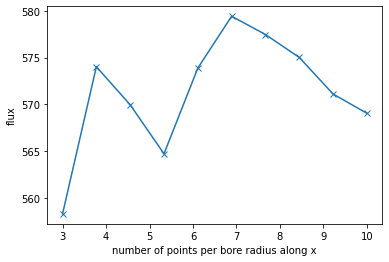

array([[3.00000000e+00, 5.58334745e+02, 2.43069673e+03],
       [3.77777778e+00, 5.74026828e+02, 2.79349770e+03],
       [4.55555556e+00, 5.69968902e+02, 3.16677761e+03],
       [5.33333333e+00, 5.64742498e+02, 3.54706805e+03],
       [6.11111111e+00, 5.73882039e+02, 3.92519249e+03],
       [6.88888889e+00, 5.79408592e+02, 4.19245227e+03],
       [7.66666667e+00, 5.77459500e+02, 4.45516975e+03],
       [8.44444444e+00, 5.75018104e+02, 4.72950306e+03],
       [9.22222222e+00, 5.71114686e+02, 5.00125985e+03],
       [1.00000000e+01, 5.69062078e+02, 5.22139253e+03]])

In [13]:

data=np.loadtxt('bender_s_cross_talk.txt')
# data=np.row_stack((data,np.loadtxt('cross_talk_results_along_r_combiner_2.txt')))
plt.plot(data[:,0],data[:,1],marker='x')
plt.xlabel("number of points per bore radius along x")
plt.ylabel("flux")
plt.show()
data


In [11]:
import sympy as sym
m,k0,k,xo,xi, E0,eps,vi=sym.symbols(' m k_0 k x_o x_i E_0 epsilon v_i')
v=sym.sqrt(vi**2 -(k/m)*(xi+xo)**2)
func=(v*m*(1+k0*xi)**2)**2
func=func.subs(xi,eps*xi)
func.series(eps,0,3).removeO().subs(eps,1)#.subs(xi,0)

-6*k*k_0**2*m*x_i**2*x_o**2 - 8*k*k_0*m*x_i**2*x_o - 4*k*k_0*m*x_i*x_o**2 - k*m*x_i**2 - 2*k*m*x_i*x_o - k*m*x_o**2 + 6*k_0**2*m**2*v_i**2*x_i**2 + 4*k_0*m**2*v_i**2*x_i + m**2*v_i**2

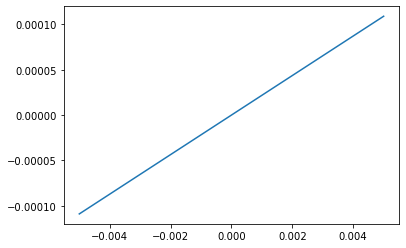

In [36]:
import sympy as sym
from constants import SIMULATION_MAGNETON
import numpy as np
import matplotlib.pyplot as plt
m,k0,k,x,xi,v0=sym.symbols(' m k_0 k x x_i v_0')
func=-3*k0**2*m*v0**2*x -12*k0**2*m*v0**2*x*xi+4*k0**2*m*v0**2*xi-k*x
Bp=1.0
rp=.01
k_val=SIMULATION_MAGNETON*Bp/rp**2
sol=sym.solve(func,x)[0]
xi_vals=np.linspace(-rp/2,rp/2)
offsets=[sol.subs([(k,k_val),(k0,1),(m,1),(v0,210)]).subs(xi,xi_val) for xi_val in xi_vals]
plt.plot(xi_vals,offsets)
plt.show()


In [6]:
from field_generators import HalbachBender
import time
import numpy as np
t=time.time()
bender=HalbachBender(.01,1.0,.012,.0254/2,'N52',100,(True,True),use_method_of_moments=True)
print('t',time.time()-t)
bender.B_norm(np.array([1.00,5e-3,6e-3])) #0.12323048198932293

t 6.249786138534546


0.12037871680573907

In [60]:
#no method of moments: 0.12323048198932293
#total method of momenets: 0.1203787167762747
#partial method of moments: 0.12038134505704569

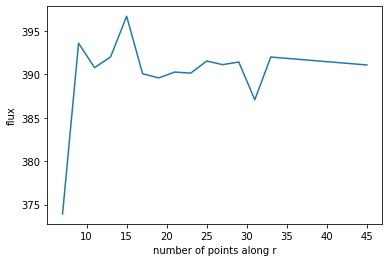

In [16]:
data=np.array([(7, 373.9197925388659),
               (19, 389.5763933774079),
               (11, 390.75879875728776),
               (17, 390.0564221026548),
               (23, 390.12524492658827),
               (21, 390.2501732413466),
               (13, 391.99792432734415),
               (9 ,393.5678519296983),
               (25, 391.51944324528 ),
               (15, 396.67482000138034),
               (27, 391.10112223371794),
               (31, 387.0610246735958),
               (29, 391.4061075625186 ),
               (33, 391.97973948267736),
               (45, 391.065884958073)])
data=data[np.argsort(data[:,0])]
plt.plot(data[:,0],data[:,1])
plt.xlabel("number of points along r")
plt.ylabel("flux")
plt.show()

In [14]:
np.argsort(data[:,1])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

19
19
19
19


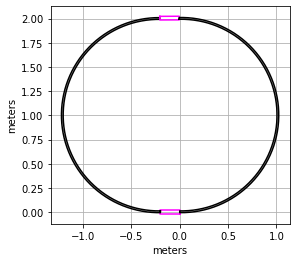

In [30]:

import lattice_elements.lens_sim
lattice_elements.lens_sim.POINT_PER_rp_x=5
t=time.time()
PTL=ParticleTracerLattice()
PTL.add_halbach_lens_sim(.02,.2)
# PTL.add_combiner_sim_lens(.2,.05)
# PTL.add_halbach_lens_sim(.02,.2)
PTL.add_segmented_halbach_bender(.0254/2.,.01,None,1.0)
PTL.add_halbach_lens_sim(.02,.2)
PTL.add_segmented_halbach_bender(.0254/2.,.01,None,1.0)
PTL.end_lattice(constrain=True)
# T=time.time()-t
# st=SwarmTracer(PTL)
# swarm_initial=st.initalize_pseudorandom_swarm_in_phase_space(3e-3,5.0,5.0,1000,same_seed=True)
# swarm=st.trace_swarm_through_lattice(swarm_initial,5e-6,30.0,parallel=True,use_fast_mode=True,accelerated=True)
# print(points,swarm.survival_rev(),T)
PTL.show_lattice()

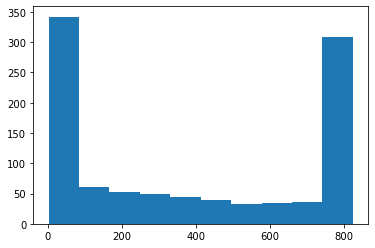

In [3]:

revs=[particle.revolutions for particle in swarm]
plt.hist(revs)
plt.show()

In [7]:
points=np.arange(5,25)
# for point in points:
#     print(solve_for_points(point))
results=parallel_evaluate(solve_for_points,points,parallel=True)

7 307.23916577683957 47.80625295639038
8 308.6906781585977 47.74387502670288
11 309.75272835216197 48.0466628074646
6 310.6141513285904 46.83918786048889
14 312.14117734371337 48.51093912124634
5 313.73733298487497 47.75024914741516
10 320.61680551570277 47.54914903640747
13 317.5262518749823 48.50691080093384
9 320.02389436561043 48.01569890975952
12 326.33049419904603 47.94690680503845
17 304.17892003430956 40.09782314300537
15 307.1636548091856 38.22232508659363
20 306.80334808179873 42.5961217880249
19 314.5087830903144 40.99805688858032
16 320.6394888459225 39.51987910270691
22 315.1826584159367 41.89946985244751
24 305.6813954081017 38.54145669937134
18 323.27241530789274 40.56489300727844
23 316.2613971509842 41.235727071762085
21 328.90255276580046 41.52495503425598


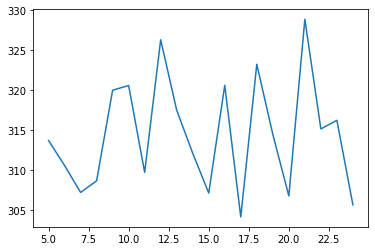

In [10]:
results=np.array(results)
plt.plot(points,results[:,0])
plt.xlabel('number of points per bore radius')
plt.show()

In [15]:
swarm.survival_rev()

15.32704791567512

21
301
done
0.001666666666673333
0.00039999400000000074
done
21
225
done
0.003348214285723214
0.0007999939999999983
done


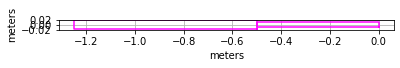

41.560441970825195


In [2]:
t=time.time()
PTL=ParticleTracerLattice(field_dens_mult=1,include_mag_cross_talk=True)
L1=.1*5
L2=.15*5
rp1=.01
rp2=.02
PTL.add_halbach_lens_sim(rp1,L1)
PTL.add_halbach_lens_sim(rp2,L2)
PTL.end_lattice()
pt=ParticleTracer(PTL)
PTL.show_lattice()
print(time.time()-t) #41

In [4]:
# el=PTL[0]
# q=np.array([.09213, 0.001 , -0.001 ])
# el.force(q)
a=[1,2]
a[3:]

[]

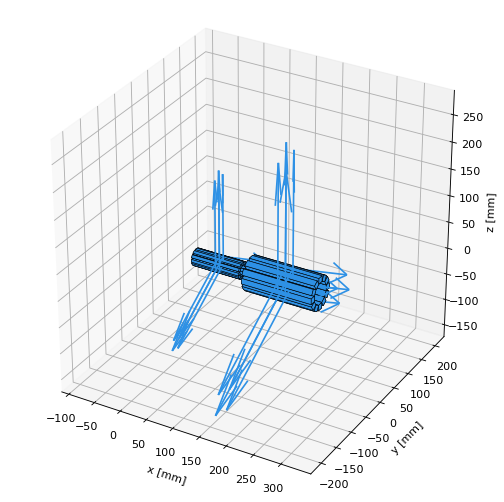

In [5]:
lens1=PTL[0].magnet.make_magpylib_magnets(False,False)
lens2=PTL[1].magnet.make_magpylib_magnets(False,False)
fringe1=PTL[0].fringe_frac_outer*PTL[0].rp
fringe2=PTL[1].fringe_frac_outer*PTL[1].rp
lens2.move_meters((L1,0,0))
col=Collection(lens1.copy(),lens2.copy())
col.show()

In [6]:
def V_interp(q):
    q_test_lab=q.copy()
    q_test_lab[0]*=-1
    q_test_lab[1]*=-1
    which_el=pt.which_element_lab_coords(q_test_lab)
    q_el=which_el.transform_lab_coords_into_element_frame(q_test_lab)
    return which_el.magnetic_potential(q_el)

1152.5809686752423


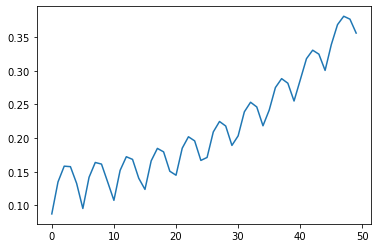

In [7]:
def get_V_both(q):
    return col.B_norm(q)*SIMULATION_MAGNETON,V_interp(q)
vals=[]
for x in np.linspace(0,4e-3):
    q_test=np.array([L1-2e-3,x,1e-3])
    vals.append(get_V_both(q_test))
vals=np.array(vals)
print(np.sum(vals))
plt.plot(vals[:,1]-vals[:,0])
# plt.plot(vals[:,1])
plt.show()

In [8]:
np.random.seed(42)
x_vals=.09+.009*np.random.random(20)
r_vals=2*(np.random.random(20)-.5)*PTL[0].ap/2
coords=arr_product(x_vals,r_vals,r_vals)
vals=[]
for coord in coords:
    a,b=get_V_both(coord)
    vals.append(abs((a-b)))
vals=np.array(vals)
np.mean(vals)

0.22105197827999684

In [7]:
q=np.array([.1, -0.001 , 0.001 ])
a,b=get_V_both(q)
a,b

(0.07181898281465375, 0.07457508524363105)

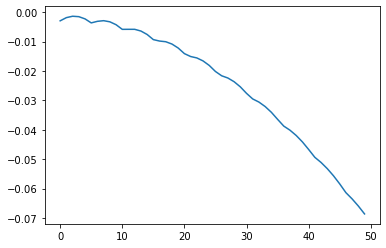

In [2]:
#no bender version
t=time.time()
model=make_optimal_solution_model('2',use_mag_errors=False,include_mag_cross_talk=True)
print(time.time()-t) #125
# t=time.time()
# print(model.mode_match(parallel=True)) #(0.7232106616880339, 704.7876780263714)
# print(time.time()-t) #260


3410.1177139282227


In [5]:
model.mode_match(parallel=True)

(0.8264562182268804, 441.89389568877243)

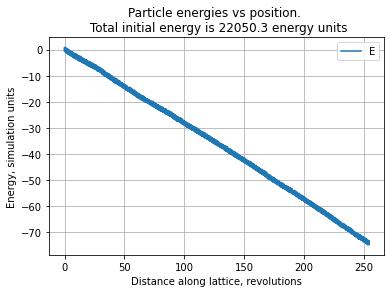

In [3]:
particle=model.swarm_tracer_ring.particle_tracer.trace(None,5e-6,10.0)
particle.plot_energies(show_only_total_energy=True)

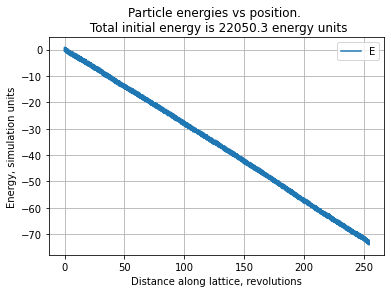

In [3]:
particle=model.swarm_tracer_ring.particle_tracer.trace(None,5e-6,10.0)
particle.plot_energies(show_only_total_energy=True)

In [5]:
%matplotlib tk
particle.plot_energies(show_only_total_energy=True)

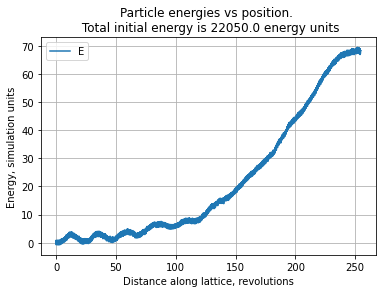

In [3]:
particle=model.swarm_tracer_ring.particle_tracer.trace(None,5e-6,10.0)
particle.plot_energies(show_only_total_energy=True)

In [8]:
%matplotlib tk
plt.plot(particle.E_vals)
plt.show()

In [2]:
#bender version
t=time.time()
model=make_optimal_solution_model('2',use_mag_errors=False,include_mag_cross_talk=True)
print(time.time()-t)
t=time.time()
print(model.mode_match(parallel=True))
print(time.time()-t)
"""
905.6626868247986
(0.8617378728871131, 352.05634769446567)
134.76980185508728
"""
a=1

1265.4266591072083
(0.8888002673902158, 283.1474717240404)
123.11985802650452


In [3]:
particle=model.swarm_tracer_ring.particle_tracer.trace(None,5e-6,10.0)

In [5]:
%matplotlib tk
particle.plot_energies(show_only_total_energy=True)

In [5]:
particle=model.swarm_tracer_ring.particle_tracer.trace(None,5e-6,10.0)

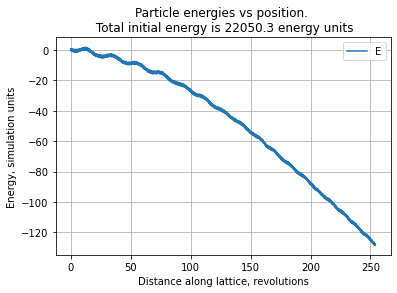

In [6]:
particle.plot_energies(show_only_total_energy=True)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import constants
constants.GRAVITATIONAL_ACCELERATION=0.0
from helper_tools import *

from storage_ring_modeler import StorageRingModel,make_optimal_solution_model
from particle_class import Swarm
from particle_tracer_lattice import ParticleTracerLattice
from field_generators import BenderSim,Collection, HalbachLens
from typing import Union
from particle_class import Particle
from particle_tracer import ParticleTracer


t=time.time()


np.random.seed(42)
PTL=ParticleTracerLattice(include_mag_cross_talk=False,use_mag_errors=False,field_dens_mult=1)
# PTL.add_drift(.5)
# PTL.add_drift(.1)
# PTL.add_halbach_lens_sim(.04,.5)
PTL.add_segmented_halbach_bender(.0254/2,.01,10,1.0)
# PTL.add_segmented_halbach_bender(.0254/2,.01,30,1.0)
# PTL.add_drift(.05)
PTL.end_lattice()

print(time.time()-t) #26

PTL.total_length

12.800781011581421


0.15937588848030265

In [4]:
el=PTL[0]
ang_perp = el.ang + np.pi / 2
norm_out = np.array([np.cos(ang_perp), np.sin(ang_perp), 0.0])
norm_out,el.ne

(array([-0.12858831,  0.99169806,  0.        ]),
 array([-0.99169806,  0.12858831,  0.        ]))

In [9]:
-4%2

0

In [7]:
from math import cos
%timeit cos(x0)

40.3 ns ± 6.84 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [ ]:
PTL.total_length,PTL[0].Lo,PTL[0].Lo+PTL[1].Lo

In [2]:
pt=ParticleTracer(PTL)
particle=Particle(qi=np.array([-1e-10,1e-3,0.0]))
particle=pt.trace(particle,1e-7,10.0)

not implemented, falling back to previous behaviour


In [3]:
%matplotlib tk
V=particle.V_vals
E=particle.E_vals
E-=E[0]
x=particle.qo_vals[:,0]
y=particle.qo_vals[:,1]
# T=particle.KE_vals
# particle.plot_energies(show_only_total_energy=True)
# plt.semilogy(x,V)
plt.plot(x,E)
plt.grid()
plt.axvline(x=.5,c='r')

In [6]:
#only in lens [-6.58788294e-01  1.04665023e-02  1.11000298e-08]
print(particle.qf)

[-6.58850679e-01  1.04751615e-02  4.56509462e-08]


In [42]:
particle.qf

array([-1.88900028e-01,  9.42104993e-03, -2.77002378e-11])

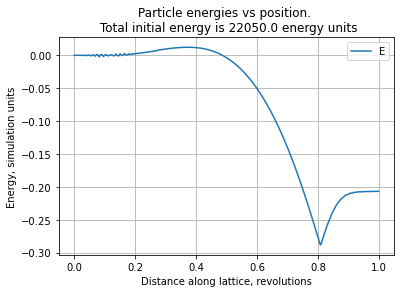

In [12]:
# %matplotlib tk
V=particle.V_vals
# T=particle.KE_vals
particle.plot_energies(show_only_total_energy=True)
# plt.semilogy(V)

array([-3.5843718521991907e-01,  1.6848139682513325e-02,
       -4.9139733829504661e-07])
7.358642317612e-06
-0.2679180653503863


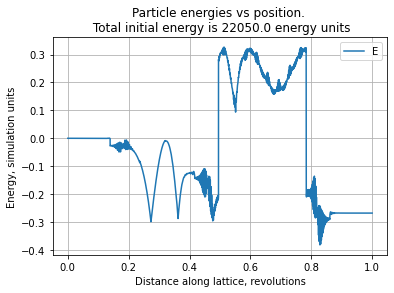

In [5]:
# %matplotlib inline
pt=ParticleTracer(PTL)
particle=Particle(qi=np.array([-1e-10,1e-3,0.0]))
particle=pt.trace(particle,1e-7,1.0)
np.set_printoptions(precision=100)
print(repr(particle.qf))
print(particle.V_vals[-1]) #0.0
print(particle.E_vals[-1]-particle.E_vals[0]) #-0.268191203726019
particle.plot_energies(show_only_total_energy=True)
x=particle.qo_vals[:,0]
V=particle.V_vals

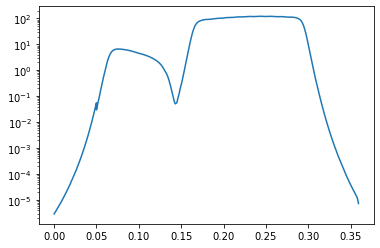

In [6]:
plt.semilogy(x,V)
# plt.axvline(x=.01,linestyle=':')
# plt.ylim([1e-6,.1])
# plt.xlim([0,.05])
plt.show()

array([-3.5843718461864749e-01,  1.6848139162913472e-02,
       -4.8342494018145949e-07])
7.358633220506292e-06
-0.268191203726019


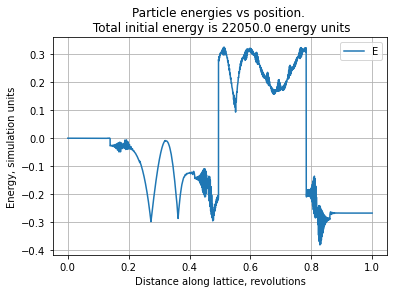

In [34]:
# %matplotlib inline
pt=ParticleTracer(PTL)
particle=Particle(qi=np.array([-1e-10,1e-3,0.0]))
particle=pt.trace(particle,1e-7,1.0)
np.set_printoptions(precision=100)
print(repr(particle.qf))
print(particle.V_vals[-1]) #0.0
print(particle.E_vals[-1]-particle.E_vals[0]) #-0.268191203726019
particle.plot_energies(show_only_total_energy=True)
x=particle.qo_vals[:,0]
V=particle.V_vals

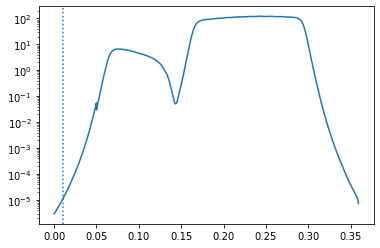

In [36]:
plt.semilogy(x,V)
plt.axvline(x=.01,linestyle=':')
# plt.ylim([1e-6,.1])
# plt.xlim([0,.05])
plt.show()

In [97]:
# V=particle.V_vals.copy()
# E=particle.E_vals.copy()
# KE=particle.KE_vals.copy()
# x=particle.qo_vals[:,0]
# # x/=np.max(x)
# F=pt.force
# plt.semilogy(x,F)
# plt.show()
# plt.semilogy(x,V)
# plt.show()
# plt.plot(x,particle.p_vals[:,1])
# plt.show()

1.0

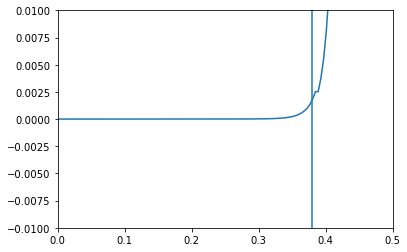

In [31]:
plt.plot(x,particle.p_vals[:,1])
plt.axvline(x=.38)
plt.ylim([-.01,.01])
plt.xlim([0,.5])
plt.show()

array([-0.2989908092915105   , -0.003078141624338151 ,
       -0.0010236105271772228])
0.4155948522679225
0.3178838203093619


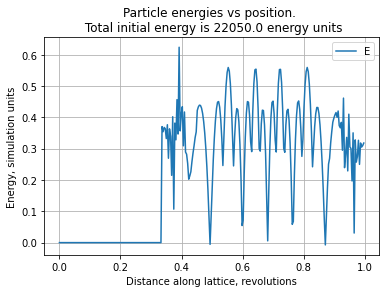

In [42]:
%matplotlib inline
pt=ParticleTracer(PTL)
particle=Particle(qi=np.array([-1e-10,3e-3,1e-3]))
particle=pt.trace(particle,5e-6,1.0)
np.set_printoptions(precision=100)
print(repr(particle.qf))
print(particle.V_vals[-1]) #0.0
print(particle.E_vals[-1]-particle.E_vals[0])
particle.plot_energies(show_only_total_energy=True)

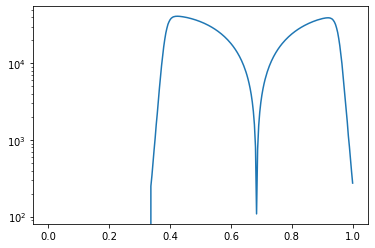

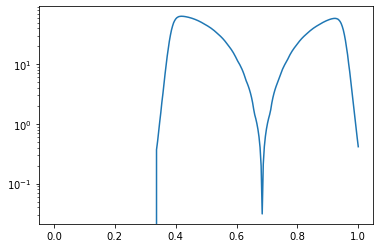

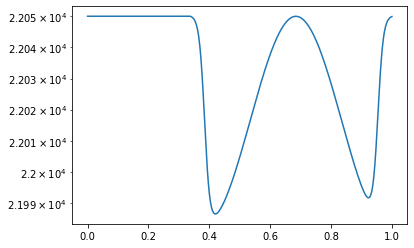

In [43]:
V=particle.V_vals.copy()
KE=particle.KE_vals.copy()
x=particle.qo_vals[:,0]
x/=np.max(x)
F=pt.force
plt.semilogy(x,F)
plt.show()
plt.semilogy(x,V)
plt.show()
plt.semilogy(x,KE)
plt.show()

array([-0.7932800231623804   ,  0.1529769259102761   ,
       -0.0008208794621275738])
0.0
0.05622737534577027


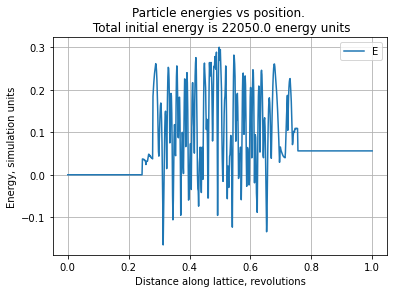

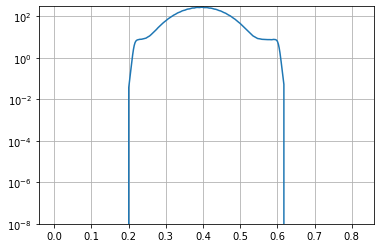

In [4]:
%matplotlib inline
particle=Particle(qi=np.array([-1e-10,3e-3,1e-3]))
particle=pt.trace(particle,5e-6,1.0)
np.set_printoptions(precision=100)
print(repr(particle.qf))
print(particle.V_vals[-1]) #0.0
print(particle.E_vals[-1]-particle.E_vals[0])
particle.plot_energies(show_only_total_energy=True)
V_vals=particle.V_vals.copy()
cutoff=1e-8
plt.semilogy(particle.qo_vals[:,0],V_vals)
plt.ylim([cutoff,np.max(V_vals)*1.1])
plt.grid()
plt.show()

In [5]:
%matplotlib tk
V_vals=particle.V_vals.copy()
cutoff=1e-8
# V_vals[V_vals<cutoff]=cutoff
plt.semilogy(particle.qo_vals[:,0],V_vals)
plt.ylim([cutoff,np.max(V_vals)*1.1])
plt.show()

In [42]:
col=ElementMagCollection()
bender=BenderSim(.01,.995,.01,.01,'N52',100,(True,True))
col.add(bender)
bender=BenderSim(.01,.995,.01,.01,'N52',100,(True,True))
col.add(bender)

In [21]:
theta=np.linspace(0,np.pi/2,10_000)
x,y,z=np.cos(theta)*1.0,np.zeros(len(theta)),np.sin(theta)*1.0
coords=np.column_stack((x,y,z))
col.B_norm(coords)
t=time.time()
# print(np.mean(bender.B_norm(coords,use_approx=False)))
time.time()-t

0.07335208373367741


6.948029041290283

In [2]:

bender=BenderSim(.01,.995,.01,.01,'N52',100,(True,True))
theta=np.linspace(0,np.pi/2,10_000)
x,y,z=np.cos(theta)*1.0,np.zeros(len(theta)),np.sin(theta)*1.0
coords=np.column_stack((x,y,z))
t=time.time()
print(np.mean(bender.B_norm(coords,use_approx=False)))
time.time()-t

0.07335208373367741


7.719597101211548

In [3]:
t=time.time()
print(np.mean(bender.B_norm(coords,use_approx=True)))
print(time.time()-t)

0.07335206347600723
0.4434638023376465


In [ ]:
#approx first method:
# t = 2
# B = 0.007429606005061092

14.775662183761597


In [5]:
from particle_tracer import ParticleTracer
from particle_class import Particle
particle=Particle(qi=np.array([-1e-10,3e-3,0]))
pt=ParticleTracer(PTL)
pt.trace(particle,1e-5,1.0)
np.set_printoptions(precision=100) #[-4.9972666278452554e-01 -2.7360369826125602e-03  4.3729650221211206e-04]
print(particle.qf)

[-4.9972666278452554e-01 -2.7360369826125602e-03  4.3729650221211206e-04]


In [2]:
from field_generators import BenderSim
bender=BenderSim(.01,.995,.01,.01,'N52',50,(True,True),use_pos_mag_angs_only=True)
theta=np.linspace(0,np.pi/2,5_000)
x,y,z=np.cos(theta)*1.0,np.zeros(len(theta)),np.sin(theta)*1.0
coords=np.column_stack((x,y,z))
t=time.time()
print(np.mean(bender.B_norm(coords)))
print(time.time()-t)

0.07251307661847291
3.2339091300964355


0.0725130577459913
0.25538086891174316


In [12]:
# from field_generators import HalbachLens,Layer
# lens=HalbachLens(.01,.005,.1,'N52',position=(0,0,0))
# # layer=Layer(.01,.005,.01,'N52',position=(1,0,0))
# lens.move_meters((1,0,0))
# lens.position_meters(),lens.layer_list[0].position_meters()

(array([1., 0., 0.]), array([1., 0., 0.]))

In [20]:
from field_generators import BenderSim
bender=BenderSim(.01,.995,.01,.01,'N52',100,(True,True))
theta=np.linspace(0,np.pi/2,1_000)
x,y,z=np.cos(theta)*1.0,np.zeros(len(theta)),np.sin(theta)*1.0
coords=np.column_stack((x,y,z))
np.mean(bender.B_norm(coords,use_approx=True))

0.00744335955144308

In [10]:

# thing=Layer(.01,.005,.1,'N52',position=(.2,.2,-.3))
lens=HalbachLens(.01,.005,.1,'N52')
np.random.seed(42)
coord=np.random.random_sample((100_000,3))*.5
t=time.time()
print(np.sum(lens.B_norm(coord,use_approx=False)))
print(time.time()-t)
t=time.time()
print(np.sum(lens.B_norm(coord,use_approx=True)))
print(time.time()-t)

5.164069672398357
1.2006349563598633
784
5.1638755826114116
0.3076050281524658


In [2]:
from field_generators import BenderSim
bender=BenderSim(.01,1.0,.01,.01,'N52',2,(True,True))
coord=np.array([1.001,0,0])
bender.B_norm(coord)

HalbachLens(id=4385537280)
HalbachLens(id=4385537904)


0.0040187864549916

In [4]:
bender.children_all

[HalbachLens(id=4385537280),
 Layer(id=5425075728),
 Cuboid(id=5425077696),
 Cuboid(id=5425077744),
 Cuboid(id=5425076688),
 Cuboid(id=5425077792),
 Cuboid(id=5425076640),
 Cuboid(id=5425076592),
 Cuboid(id=5425076544),
 Cuboid(id=5425076496),
 Cuboid(id=5425076448),
 Cuboid(id=5425076400),
 Cuboid(id=5425076352),
 Cuboid(id=5425076304),
 HalbachLens(id=4385537904),
 Layer(id=5425075680),
 Cuboid(id=5425076160),
 Cuboid(id=5425076112),
 Cuboid(id=5425076064),
 Cuboid(id=5425076016),
 Cuboid(id=5425075968),
 Cuboid(id=5425075920),
 Cuboid(id=5425075872),
 Cuboid(id=5425075344),
 Cuboid(id=5425075296),
 Cuboid(id=5425075200),
 Cuboid(id=5425077600),
 Cuboid(id=5425077552)]

In [6]:
val=0
for lens in bender.lens_list:
    val+=lens.B_vec(coord)
np.linalg.norm(val)

0.004018786454991601

In [4]:
2.00939323*2

4.01878646

In [4]:
from lattice_elements.arrange_magnets import are_close_enough,is_valid_neighbors,is_valid_field_generator_el,is_valid_interp_el
lattice=model.lattice_ring
el=lattice[2]
el1=lattice[0]
el2=lattice[3]
# are_close_enough(el,el1),is_valid_neighbors(el,el1)
is_valid_interp_el(el),is_valid_field_generator_el(el)

(True, True)

In [2]:
from async_de import solve_async

def func(x):
    return np.linalg.norm(x)+np.random.random()
bounds=[(-1,1.0)]*10

solve_async(func,bounds,time_out_seconds=200,save_population='final_pop_test',disp=False)

DONE
------ITERATIONS:  1904
POPULATION VARIABILITY: [0.1294917388162229  0.13535419267345672 0.12976682233079878
 0.15240672950202788 0.11610666984921088 0.12185805532480144
 0.1467463038391474  0.15072181625071865 0.1333257178089702
 0.10992481641030616]
BEST MEMBER BELOW
---population member---- 
DNA: array([-0.04334084217503281 ,  0.057222998635286626,
        0.27641371550277205 ,  0.12121947430704622 ,
        0.09862466696599415 ,  0.052140960352442714,
        0.048388509333950336,  0.23949985572930557 ,
       -0.18515401571951406 ,  0.23097792031549258 ])
cost: 0.5209245987211689


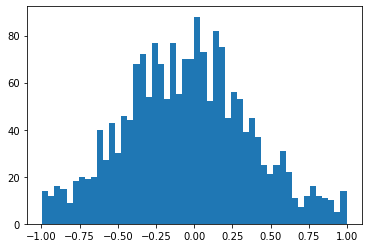

In [5]:
data=np.loadtxt('final_pop_test_full')
plt.hist(data[:,0],bins=50)
plt.show()

In [28]:
from type_hints import sequence,ndarray
def confine_values_to_bounds_wrap(values: sequence, bounds: sequence) -> ndarray:
    values = np.array(values)
    for i, ((lower, upper), val) in enumerate(zip(bounds, values)):
        bound_span = upper - lower
        if val > upper:
            delta_val = val - upper
            values[i] = upper - delta_val % bound_span
        elif val < lower:
            delta_val = lower - val
            values[i] = lower + delta_val % bound_span
    return values

def confine_values_to_bounds_distribute(values: sequence, bounds: sequence) -> ndarray:
    values = np.array(values)
    bounds=np.array(bounds)
    return values

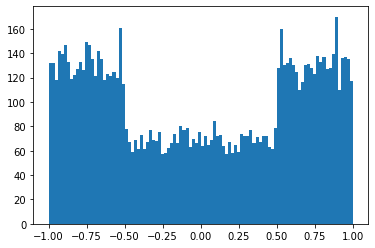

In [32]:
bounds=[(-1,1.0)]
values=3*(np.random.random(10_000)-.5)
new_vals=[confine_values_to_bounds([val],bounds)[0] for val in values]
plt.hist(new_vals,bins=100)
plt.show()

In [48]:
# def distance(el1,el2):
#
# el=lattice[0]
# el
# for el_neighbor in lattice:
from lattice_elements.elements import HalbachLensSim,CombinerLensSim
from numpy.linalg import norm

# for
# dr1=el1.r1-el2.r1
# dr2=el1.r1-el2.r2
# dr3=el1.r2-el2.r2
# dr4=el1.r2-el2.r1
# dr_vals=[dr1,dr2,dr3,dr4]
# dr_vals
field_generator_els=(HalbachLensSim,CombinerLensSim)
def are_close_enough(el1,el2):
    dr=np.array([norm(pos1-pos2) for pos1,pos2 in itertools.product([el1.r1,el1.r2],[el2.r1,el2.r2])])
    dr_min=min(dr)
    for el in [el1,el2]:
        print(el.rp)
        if type(el) in field_generator_els and el.rp>dr_min:
            return True
    return False

are_close_enough(el1,el2)


<lattice_elements.drift.Drift object at 0x2a85d3730> <lattice_elements.lens_sim.HalbachLensSim object at 0x2a85d1f60>
inf
0.007415429587324836


False

In [118]:
import sympy as sym
from sympy.physics.mechanics import dynamicsymbols#, init_vprinting
# init_vprinting()
m,t,kx,ky=sym.symbols('m t k_x k_y')
x,y,z=dynamicsymbols('x y z',real=True)
ky=0
V=sym.Function('V')(x,y,z)
h=1+kx*x+ky*y
T=(m/2)*(x.diff(t)**2+y.diff(t)**2+(h*z.diff(t))**2)
L=T-V
funcs=[]
for val in [x]:
    funcs.append(-L.diff(val.diff(t)).diff(t)+L.diff(val))
    display(funcs[-1])

k_x*m*(k_x*x(t) + 1)*Derivative(z(t), t)**2 - m*Derivative(x(t), (t, 2)) - Derivative(V(x(t), y(t), z(t)), x(t))

In [95]:
v,xp,xpp,yp,ypp,sp,spp=sym.symbols('v x\' x\'\' y\' y\'\' s\' s\'\'')
xz,yz,zz=sym.symbols('x y z')


zd_sub=v/sp
zdd_sub=v**2 *spp/sp**4
xd_sub=yd_sub=v/sp
xdd_sub=(v**2/sp)*(xpp/sp -xp*spp/sp**2)
ydd_sub=(v**2/sp)*(ypp/sp -yp*spp/sp**2)

zd=sym.Derivative(z,t)
zdd=sym.Derivative(z,t,2)
yd=sym.Derivative(y,t)
ydd=sym.Derivative(y,t,2)
xd=sym.Derivative(x,t)
xdd=sym.Derivative(x,t,2)
_x,_y,_z,_V=sym.symbols('x y z V')
sub=[(zdd,zdd_sub),(ydd,ydd_sub),(xdd,xdd_sub),(zd,zd_sub),(yd,yd_sub),(xd,xd_sub),(x,xz),(y,yz),(z,zz),(x,_x),(y,_y),(z,_z)]

In [107]:
funcs[0].subs(sub).subs(spp,0)

-k_x*m*v**2*(k_x*x + 1)/s'**2 + m*v**2*x''/s'**2 + Derivative(V(x, y, z), x)

In [68]:
import sympy as sym
ko,x,vo,vi,kb,m,delta=sym.symbols('k_o x v_o v_i k_B m \delta')
func=ko-3*ko**2*x-ko*vo**2/vi**2-kb*x/(vi**2*m)
x_mean=sym.solve(func,x)[0]
x_mean=x_mean.subs(vi,vo*(1+delta))
deltaX=x_mean.series(delta,0,2).removeO()
2*deltaX.subs(m,1).subs(vo,210.0).subs(kb,2*800/.01**2).subs(ko,1).subs(delta,10/210),2*10/210

(0.000520694507292822, 0.09523809523809523)

In [69]:
deltaX=sym.symbols('\Delta_x')
sp_x=(1+2*ko*x)
sp_delta=(1+2*delta*deltaX)
func=sp_x*ko-3*ko**2*sp_delta*x-ko*vo**2*sp_x/vi**2-kb*sp_delta*x/(vi**2*m)
func=func.subs(vi,vo*(1+delta)).series(delta,0,2).removeO().expand()
func.collect(x)

2*\delta*k_o + x*(-2*\Delta_x*\delta*k_B/(m*v_o**2) - 6*\Delta_x*\delta*k_o**2 + 2*\delta*k_B/(m*v_o**2) + 4*\delta*k_o**2 - k_B/(m*v_o**2) - 3*k_o**2)

In [44]:

sp_x=(1+2*ko*x)
sp_delta=(1)#+2*delta*deltaX)
func=sp_x*ko-3*ko**2*sp_delta*x-ko*vo**2*sp_x/vi**2-kb*sp_delta*x/(vi**2*m)
func.subs(vi,vo*(1+delta)).series(delta,0,3).removeO().expand()
func

-k_B*x/(m*v_i**2) - 3*k_o**2*x + k_o*(2*k_o*x + 1) - k_o*v_o**2*(2*k_o*x + 1)/v_i**2

In [1]:
import sympy as sym
s,xi,xdi,K0,dk=sym.symbols('s x_i x\'_i K0 \Delta_k')
A,B=sym.symbols('A B')
phi=sym.sqrt(K0)*s+dk*xi*s/(2*sym.sqrt(K0))
x=A*sym.cos(phi)+B*sym.sin(phi)
xd=x.diff(s)
display(x)
display(xd)

A*cos(sqrt(K0)*s + \Delta_k*s*x_i/(2*sqrt(K0))) + B*sin(sqrt(K0)*s + \Delta_k*s*x_i/(2*sqrt(K0)))

-A*(sqrt(K0) + \Delta_k*x_i/(2*sqrt(K0)))*sin(sqrt(K0)*s + \Delta_k*s*x_i/(2*sqrt(K0))) + B*(sqrt(K0) + \Delta_k*x_i/(2*sqrt(K0)))*cos(sqrt(K0)*s + \Delta_k*s*x_i/(2*sqrt(K0)))

In [2]:
x=sym.series(x,xi,0,2).removeO()
xd=sym.series(xd,xi,0,2).removeO()
funcs=[x.subs(s,0)-xi,xd.subs(s,0)-xdi]
sub=sym.solve(funcs,(A,B))
display(sub[A])
display(sub[B])
x=x.subs(sub)
xd=xd.subs(sub)

x_i

2*sqrt(K0)*x'_i/(2*K0 + \Delta_k*x_i)

In [3]:
eps=sym.symbols('eps')
x.subs(xi,xi*eps).subs(xdi,xdi*eps).series(eps,0,3).removeO().subs(eps,1)

x_i*cos(sqrt(K0)*s) + \Delta_k*s*x'_i*x_i*cos(sqrt(K0)*s)/(2*K0) - \Delta_k*s*x_i**2*sin(sqrt(K0)*s)/(2*sqrt(K0)) + x'_i*sin(sqrt(K0)*s)/sqrt(K0) - \Delta_k*x'_i*x_i*sin(sqrt(K0)*s)/(2*K0**(3/2))

In [4]:
xd.subs(xi,xi*eps).subs(xdi,xdi*eps).series(eps,0,3).removeO().subs(eps,1)

-sqrt(K0)*x_i*sin(sqrt(K0)*s) - \Delta_k*s*x_i**2*cos(sqrt(K0)*s)/2 + x'_i*cos(sqrt(K0)*s) - \Delta_k*s*x'_i*x_i*sin(sqrt(K0)*s)/(2*sqrt(K0)) - \Delta_k*x_i**2*sin(sqrt(K0)*s)/(2*sqrt(K0))

In [108]:
from constants import *
2*BHOR_MAGNETON*1.0/(.01**2 * MASS_LITHIUM_7*210**2)

delta=10/210
xi=5e-3
k0=1/1.0
8*delta*k0**3*xi,2*delta*k0**2,4*k0**3*xi,3*k0**2
360*2*delta

k0,kb,delta,xi,x,vo,m=sym.symbols('k_0 k_b delta x_i x v_o m' )
func=-3*k0**2*(1+2*delta+4*k0*xi+8*delta*k0*xi)*x
func+=2*k0*(4*delta*k0*xi+delta+2*k0*xi)*(1+2*k0*x)
func+=-kb*x/(m*vo**2) - 2*kb*delta*x/(m*vo**2)
sym.collect(func.expand(),x)

361.0107328765933

In [5]:
import sympy as sym
k0,kb,xo,m,vi,x,vd,Df,v,vo,vk,delta, kb=sym.symbols('k_0 k_B xo m vi x v_d {\Delta}F v v_o v_k delta k_b' )

func=k0*m*vi**2-3*k0**2*m*vi**2*x -m*k0*vo**2+Df
sp=(1+k0*x)
div=m*v**2/sp**2
func=func/div
func=func.series(x,0,2).removeO()
# v_subs=vk
# func=func.subs(v,v_subs)
# vi_subs=vk
# func=func.subs(vi,vi_subs)
# vk_subs=vo*(1+delta)
# func=func.subs(vi,vk_subs)
# func=func.series(delta,0,2).removeO()
# func=func.subs(Df,-kb*x)
# func=func.series(x,0,2).removeO()
func

-k_0*v_o**2/v**2 + k_0*vi**2/v**2 + x*(-2*k_0**2*v_o**2/v**2 - k_0**2*vi**2/v**2 + 2*k_0*{\Delta}F/(m*v**2)) + {\Delta}F/(m*v**2)

In [57]:
import sympy as sym
k0,kb,xo,m,vi,x,vd,Df,v,vo,vk,delta, kb=sym.symbols('k_0 k_B xo m vi x v_d {\Delta}F v v_o v_k delta k_b' )

func=k0*m*vi**2-3*k0**2*m*vi**2*x -m*k0*vo**2+Df

div=m*vi**2/(1+0*2*k0*x)
func=func/div
func=func.series(x,0,2).removeO()
func.subs(v,vi)

-3*k_0**2*x - k_0*v_o**2/vi**2 + k_0 + {\Delta}F/(m*vi**2)

In [68]:
from constants import *
rp=.01
K=2*SIMULATION_MAGNETON/rp**2
dx=(220**2-210**2)/K
dx

0.000270090775853945

In [75]:
360*(1+(2*10/210)/360)**2-360,4*10/210

(0.1905013857394806, 0.19047619047619047)

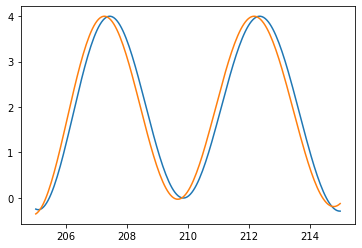

In [8]:
speeds=np.linspace(205,215,200)
x,y=lattice.stability_factors(atom_speed=speeds)
plt.plot(speeds,x)
plt.plot(speeds,y)

In [6]:
from temp import Lattice
lattice=Lattice(atom_speed=210)
t=time.time()
lattice.build_matrix_lattice_from_sim_lattice(model.lattice_ring)
print(time.time()-t)
np.set_printoptions(precision=100)
print(repr(lattice.M_total()))
lattice.stability_factor()

15.438064098358154
array([[ 1.0312106697598011  , -0.006621928460911701],
       [ 1.3318911231235848  ,  0.9611812031538979  ]])


0.030374624747263157

In [2]:
from optimizer import make_bounds,Solver,Solution

injector_params=(0.298, 0.01824404317562657, 0.23788459956313238,
                     0.03, 0.17709193919623706, 0.009704452870607685,
                     0.10615316973237765, 0.22492222955994753, 0.22148833301792942)
ring_params = (0.012593597021671735, 0.010115712864579277, 0.007415429587324836,
               0.04513305464223805, 0.1, 0.49472608069737817)


In [3]:
def wrap(params):
    solver = Solver('ring', '2', injector_params=injector_params, use_solenoid_field=False)
    model=solver.make_system_model(params)
    cost, flux_mult = model.mode_match(floor_plan_cost_cutoff=.05)
    sol = Solution(params, cost, flux_mult=flux_mult)
    lattice=Lattice()
    lattice.build_matrix_lattice_from_sim_lattice(model.lattice_ring)
    return sol,lattice
def stability_fact(lattice:Lattice):
    M=lattice.M_total()
    m11, m12, m21, m22 = matrix_components(M)
    return 2.0 - (m11 ** 2 + 2 * m12 * m21 + m22 ** 2)

In [5]:

bounds=make_bounds('ring','2')
bounds=shrink_bounds_around_vals(bounds,ring_params,.05)

In [6]:
from helper_tools import low_discrepancy_sample,parallel_evaluate
samples=low_discrepancy_sample(bounds,10)
results=parallel_evaluate(wrap,samples)

In [1]:
import numpy as np

from particle_tracer_lattice import ParticleTracerLattice
from storage_ring_modeler import StorageRingModel, DEFAULT_SIMULATION_TIME
from helper_tools import low_discrepancy_sample,parallel_evaluate
from optimizer import Solver,make_bounds
import time
def wrap(params):
    t=time.time()
    solver=Solver('both','2')
    solver.solve(params)
    return time.time()-t

x=np.array([0.01683605, 0.01096635, 0.00901207, 0.06920193, 0.52147994,
            0.41775408, 0.19324068, 0.02981228, 0.26949321, 0.01065287,
            0.11383458, 0.01449882, 0.24165137, 0.25706841, 0.05396852])
bounds=make_bounds('both','2')


samples=low_discrepancy_sample(bounds,200,seed=42)
times=parallel_evaluate(wrap,samples)


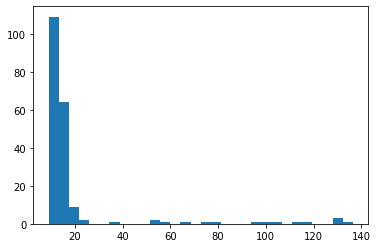

23.40104821946515 19.637413535118103 13.137258768081665 9.010569095611572 136.4221806526184


In [2]:
import matplotlib.pyplot as plt
plt.hist(times,bins=30)
plt.show()
print(np.std(times),np.mean(times),np.median(times),np.min(times),np.max(times))

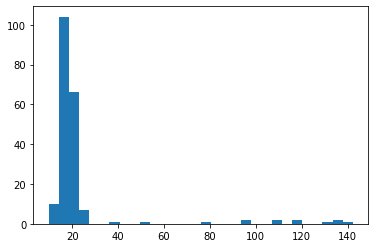

22.996478673173108 23.621918272972106 17.95168697834015 9.6594078540802 142.32841396331787


In [7]:
import matplotlib.pyplot as plt
plt.hist(times,bins=30)
plt.show()
print(np.std(times),np.mean(times),np.median(times),np.min(times),np.max(times))

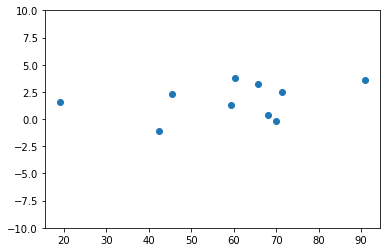

In [10]:
stabilities=[stability_fact(result[1]) for result in results]
fluxes=[result[0].flux_mult for result in results]
plt.scatter(fluxes,stabilities)
plt.ylim([-10,10])
plt.show()
# lattice=results[np.argmax(fluxes)][1]
# params=array([0.01497523531016966 , 0.009880562163771705, 0.007629694004019476,
#               0.047420410840072064, 0.10509576760232449 , 0.4928786645348873  ])

In [5]:
x0=np.array([0.012441427406641448, 0.01055250139969738 , 0.007271526594122626,
             0.04043486734465543 , 0.10087133534252644 , 0.4966780064519253  ])
solver = Solver('ring', '2', injector_params=injector_params, use_solenoid_field=False)
model=solver.make_system_model(x0)
lattice0=Lattice()
lattice0.build_matrix_lattice_from_sim_lattice(model.lattice_ring)

/Users/williamdebenham/Desktop/storageRing/storageRing/storageRingModel/latticeElements/class_HalbachBenderSegmented.py:75: UserWarning: bender aperture being limited by the good field region
  warnings.warn("bender aperture being limited by the good field region")


In [13]:
np.clip([-.01],0.0,np.inf)

array([0.])

In [22]:
lattice0=results[np.argsort(fluxes)[-1]][1]

(False, 65.5137713195095)

In [7]:
lattice_ring=model.lattice_ring
swarm_initial=model.swarm_tracer_ring.initialize_pseudorandom_y_dim_swarm(1e-3,1.0,100)

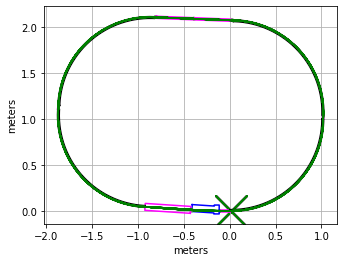

In [14]:
num=16
lattice=Lattice()
lattice.elements=lattice0.elements[:num]
L=sum([el.Lo for el in lattice_ring.el_list[:num]])
swarm_traced_sim=model.swarm_tracer_ring.trace_swarm_through_lattice(swarm_initial,5e-6,L/210.0,use_fast_mode=False)
lattice_ring.show_lattice(swarm=swarm_traced)

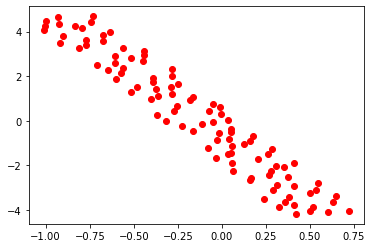

(100, 0.00045685799290855975, 2.633102711780711)

In [15]:
vals,vals1=[],[]
for particle in swarm_traced_sim:
    if not particle.clipped:
        yf,pyf=particle.qo_vals[-1,1],particle.po_vals[-1,1]
        vals.append(yf)
        vals1.append(pyf)
        ang_yf=pyf/DEFAULT_ATOM_SPEED
        plt.scatter(1e3*yf,pyf,c='r')
plt.show()
trace_pos_std,trace_angle_std=np.std(vals),np.std(vals1)
len(vals),trace_pos_std,trace_angle_std

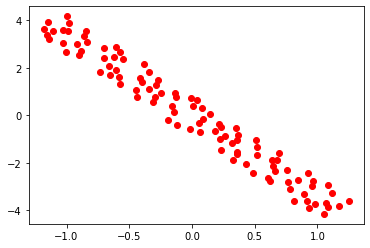

(0.0006868531771867722, 2.362973580712104)

In [16]:
swarm_traced_mat=lattice.trace_swarm(swarm_initial)
vals,vals1=[],[]
for particle,particle1 in zip(swarm_traced_mat,swarm_traced_sim):
    if not particle1.clipped:
        yf,pyf=particle.qf[1],particle.pf[1]
        vals.append(yf)
        vals1.append(pyf)
        # ang_yf=pyf/DEFAULT_ATOM_SPEED
        plt.scatter(1e3*yf,pyf,c='r')
plt.show()
mat_pos_std,mat_angle_std=np.std(vals),np.std(vals1) #(0.00038766657880148113, 1.0341991769438028)
mat_pos_std,mat_angle_std

In [17]:
lattice.is_stable()

True

In [92]:
lattice_ring[6].L,lattice_ring[6].rp,lattice[5].L

(0.04043486734465543, 0.007271526594122626, 1.5862688121316775)

In [1]:
import sympy as sym
delta_r,a,c=sym.symbols('Delta_r a c',real=True)
s,k=sym.symbols('s k',real=True,positive=True)
phi=sym.sqrt(k)*s
x=sym.cos(phi)*(a-1)*delta_r+sym.sin(phi)*c*delta_r/sym.sqrt(k)
# s0=sym.solve(x.diff(s),s)[0]
# sym.simplify(x.subs(s,s0))
s0=sym.atan(c/(sym.sqrt(k)*(a-1)))/sym.sqrt(k)
sym.simplify(x.subs(s,s0))

Delta_r*sqrt(c**2 + k*(a - 1)**2)*Abs(a - 1)/(sqrt(k)*(a - 1))

In [64]:

def M_at_s(s):
    s=s%lattice.total_length()
    length_cumulative=np.cumsum([el.L for el in lattice])
    el_index=np.argmax(s<length_cumulative)
    el_inside=lattice[el_index]
    delta_s=s-length_cumulative[el_index-1] if el_index>0 else s
    M=el_inside.M_func(el_inside.L-delta_s)
    for el in lattice[el_index+1:]:
        M=el.M@M
    for el in lattice[:el_index]:
        M=el.M@M
    M_last=el_inside.M_func(delta_s)
    M=M_last@M
    return M
def get_beta(s):
    m11,m12,m21,m22=matrix_components(M_at_s(s))
    beta=2*m12/np.sqrt(2-m11**2-2*m12*m21-m22**2)
    return beta
s_vals=np.linspace(0.0,lattice.total_length(),100)
betas=[get_beta(s) for s in s_vals]

/var/folders/c3/_byqmhpx62b_f0jnb2ht27y40000gn/T/ipykernel_82893/674598058.py:17: RuntimeWarning: invalid value encountered in sqrt
  beta=2*m12/np.sqrt(2-m11**2-2*m12*m21-m22**2)


In [23]:
import numpy as np
a=np.array([[1,3.4],[6.0,-2.]])
np.linalg.eigvals(a)

array([ 4.25920161, -5.25920161])

In [8]:
# magnets = el.build_bender(True, (True, True), use_method_of_moments=True, num_lenses=el.num_magnets)
s=sc_max-.05
# s=1e-9
xo_max=el.rp-x0
num_samples=10
xo_vals=np.linspace(-xo_max/4.0,xo_max/4.0,num_samples)
coords = np.array([el.convert_center_to_cartesian_coords(s, x0+xo, 0.0) for xo in xo_vals])
B_norm_grad,B_norm =  magnets.B_norm_grad(coords,use_approx=True,return_norm=True)
forces=-SIMULATION_MAGNETON *B_norm_grad
norm_perps = xo_unit_vector_bender_el_frame(el,coords[0])
force_r = [np.dot(norm_perps, force) for force in forces]
# forces[0]
force_r[:5]

[-22027.7544281489,
 -26891.436289671456,
 -31749.371453022464,
 -36601.77584708146,
 -41449.08644165778]

In [9]:
forces=np.array([el.force(coord) for coord in coords])
forces_o=np.array([el.transform_element_momentum_into_local_orbit_frame(coord,force) for coord,force in zip(coords,forces)])
forces_o[:5,1]

array([-22027.91682093, -26891.69030486, -31749.72403537, -36602.22681173,
       -41449.61302969])

In [75]:
%matplotlib tk
coord_lab=np.array([el.transform_element_coords_into_lab_frame(coord) for coord in coords])
PTL.show_lattice(show_immediately=False,plot_outer=True)
plt.plot(coord_lab[:,0],coord_lab[:,1],linewidth=5)
plt.show()

In [ ]:
#100: 59.5
#200: 45.2
#500: 41.0
#1000: 41.9
#3000: 42.5

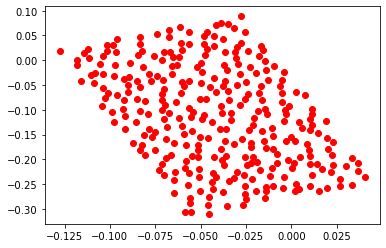

(3.644122195934458e-05, 0.09999201789807267)

In [12]:
%matplotlib inline
swarm_initial=st.initialize_pseudorandom_y_dim_swarm(1e-4,.1,300,seed=42)
swarm_traced_sim=st.trace_swarm_through_lattice(swarm_initial,1e-6,1.0,use_fast_mode=False,parallel=False)
vals,vals1=[],[]
for particle in swarm_traced_sim:
    if not particle.clipped:
        yf,pyf=particle.qo_vals[-1,1],particle.po_vals[-1,1]
        vals.append(yf)
        vals1.append(pyf)
        ang_yf=pyf/DEFAULT_ATOM_SPEED
        plt.scatter(1e3*yf,pyf,c='r')
plt.show()
np.std(vals),np.std(vals1)

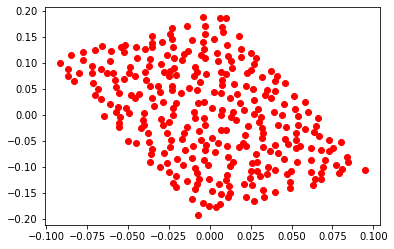

(4.0005281848668937e-05, 0.09162980522964558)

In [13]:
swarm_traced_mat=lattice.trace_swarm(swarm_initial)
vals,vals1=[],[]
for particle,particle1 in zip(swarm_traced_mat,swarm_traced_sim):
    if not particle1.clipped:
        yf,pyf=particle.qf[1],particle.pf[1]
        vals.append(yf)
        vals1.append(pyf)
        # ang_yf=pyf/DEFAULT_ATOM_SPEED
        plt.scatter(1e3*yf,pyf,c='r')
plt.show()
np.std(vals),np.std(vals1) #(0.00038766657880148113, 1.0341991769438028)

In [9]:
from matrixMethodTracing import dense_combiner_trajectory_curve,cumulative_trajectory_length,unit_vec_perp_to_path
magnets = el.magnet.make_magpylib_magnets(False, False)
coords = dense_combiner_trajectory_curve(el)
norm_perps = unit_vec_perp_to_path(coords)
s = cumulative_trajectory_length(coords)
# forces = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords)
# F_xo = [np.dot(norm, force) for norm, force in zip(norm_perps, forces)]

In [11]:
dx=100e-6
coords_b=coords+norm_perps*dx
coords_a=coords-norm_perps*dx
forces_a = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords_a)
F_a_xo = np.array([np.dot(norm, force) for norm, force in zip(norm_perps, forces_a)])
#
forces_b = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords_b)
F_b_xo = np.array([np.dot(-norm, force) for norm, force in zip(norm_perps, forces_b)])

In [12]:
F_a_xo[:10],F_b_xo[:10]
forces_b[30_000],forces_a[30_000]

(array([-1.59507613e+03,  1.76306244e+04, -3.35213716e-02]),
 array([-1.58181359e+03,  1.75216210e+04, -3.33397570e-02]))

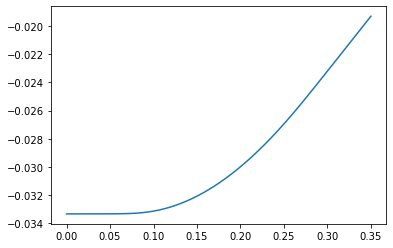

In [13]:
plt.plot(coords_b[:,0],coords_b[:,1])



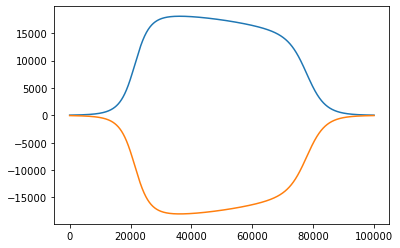

In [14]:
%matplotlib inline
plt.plot(F_b_xo)
plt.plot(F_a_xo)
plt.show()

In [15]:
# ds=np.linalg.norm(coords[1]-coords[0])
k_vals=abs(F_b_xo-F_a_xo)/(2*dx)


3884.142849012755

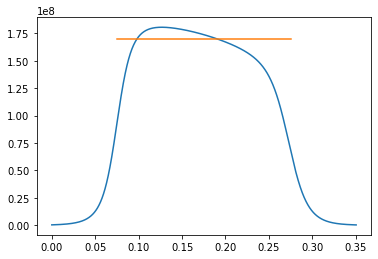

In [16]:
L=0.20021169598724736
k0=np.trapz(k_vals,x=s)/L

plt.plot(s,k_vals)
l=np.linspace(el.space,el.space+el.Lm)
plt.plot(l,k0*np.ones(len(l)))
1.011*k0/210**2

In [17]:
((k0*.03)**2/210**2)/k0

3.457693930871889

In [18]:
from latticeElements.orbitTrajectories import combiner_halbach_orbit_coords_el_frame
magnets = el.magnet.make_magpylib_magnets(False, False)
coords = combiner_halbach_orbit_coords_el_frame(el)
s = cumulative_trajectory_length(coords)
ds_vec = coords[1:] - coords[:-1]
ds=np.linalg.norm(ds_vec,axis=1)
angles=np.arctan2(ds_vec[:,1],ds_vec[:,0])
delta_angle=angles[1:]-angles[:-1]
R=ds[:-1]/delta_angle


In [19]:
V=SIMULATION_MAGNETON*.8*.03**2/.05**2
KE=.5*DEFAULT_ATOM_SPEED**2
np.sqrt(2*(KE-V))

208.90545107389633

In [166]:
dx=3e-3
norm_perps = unit_vec_perp_to_path(coords)
coords_b=coords+norm_perps*dx
coords_a=coords-norm_perps*dx
coords_a=coords_a
coords_b=coords_b
forces_a = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords_a)
F_a_xo = np.array([np.dot(norm, force) for norm, force in zip(norm_perps, forces_a)])
#
forces_b = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords_b)
F_b_xo = np.array([np.dot(norm, force) for norm, force in zip(norm_perps, forces_b)])
forces = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords)
F=np.array([np.dot(norm, force) for norm, force in zip(norm_perps, forces)])

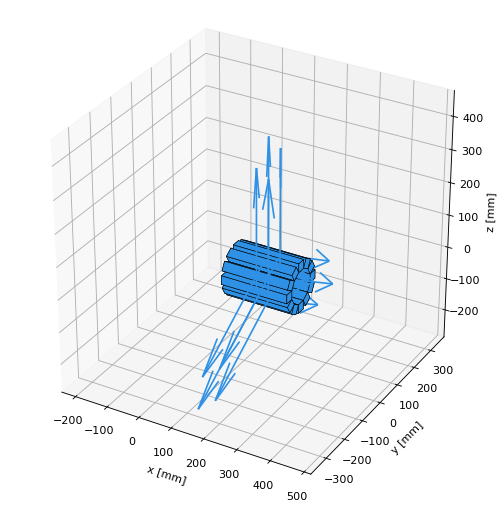

In [171]:
%matplotlib inline
magnets.show()

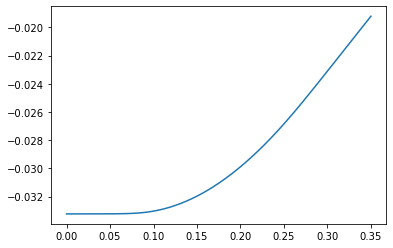

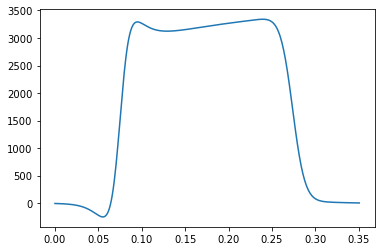

In [179]:
plt.plot(coords[:,0],coords[:,1])
plt.show()
B=np.array([np.dot(norm, force) for norm, force in zip(norm_perps, forces)])
forces = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords)
# plt.plot(s,forces[:,1])
# plt.plot(s,forces_a[:,1])
# plt.plot(s,forces_b[:,1])
plt.plot(s,forces_b[:,1]-forces_a[:,1])
plt.show()

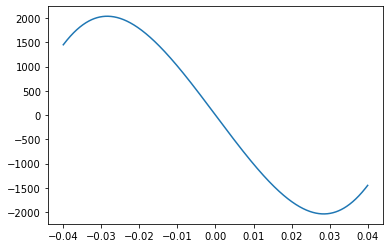

In [184]:
x0=.055
y=np.linspace(-.04,.04,1000)
coords=arr_product([x0],y,[0])
forces = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords)
plt.plot(y,forces[:,1])
plt.show()

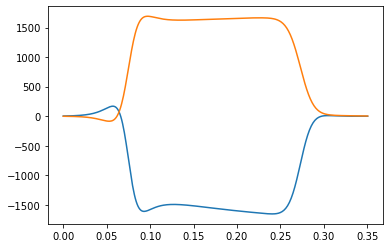

In [168]:
Fc=F
Ft1=F_a_xo-Fc
Ft2=F_b_xo-Fc
plt.plot(s,Ft2)
plt.plot(s,Ft1)
plt.show()


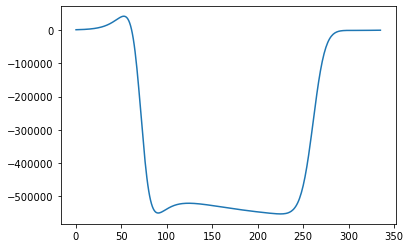

-11.938439638630907

In [161]:
k_vals=(Ft2-Ft1)/(2*dx)
plt.plot(k_vals)
plt.show()
L=0.20021169598724736
k0=np.trapz(k_vals,x=s)/L
k0/210**2

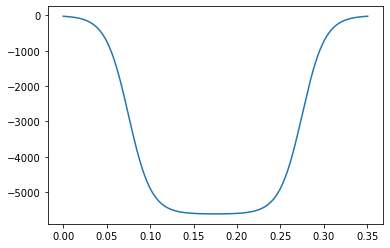

-12.738772036002716

In [201]:
x=np.linspace(0.0,el.L,1000)
y0=.01
coords=arr_product(x,[y0],[0])
forces = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords)
plt.plot(x,forces[:,1])
plt.show()
kappa=np.trapz(forces[:,1],x=x)/(L*y0)
kappa/210**2

In [195]:
# y0*k*L



-12.714460744519211

In [66]:
from matrixMethodTracing import unit_vec_perp_to_path
magnets = el.magnet.make_magpylib_magnets(False, False)
coords = dense_combiner_trajectory_curve(el)
s = cumulative_trajectory_length(coords)
forces = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords)
norm_perps = unit_vec_perp_to_path(coords)
F_xo = [np.dot(norm, force) for norm, force in zip(norm_perps, forces)]
Kappa = abs(np.trapz(F_xo, x=s))
indices_in_combiner = (coords[:, 0] > el.space) & (coords[:, 0] < el.Lm + el.space)
y_vals_in_combiner = coords[:, 1][indices_in_combiner]
y_mean_in_combiner = abs(np.mean(y_vals_in_combiner))
gamma = L_eff_combiner * SIMULATION_MAGNETON * 2 * y_mean_in_combiner / el.rp ** 2
Bp_optimal = Kappa / gamma
Bp_optimal

AttributeError: 'CombinerLensSim' object has no attribute 'build_bender'

In [35]:
#0.8147750780809235

In [69]:
from matrixMethodTracing import dense_combiner_trajectory_curve,calculate_trajectory_length
def mean_weighted_bend_radius_combiner(el):
    magnets = el.magnet.make_magpylib_magnets(False, False)
    coords = dense_combiner_trajectory_curve(el)
    indices_in_combiner = (coords[:, 0] > el.space) & (coords[:, 0] < el.Lm + el.space)
    coords_in_combiner = coords[indices_in_combiner]
    forces = -SIMULATION_MAGNETON * magnets.B_norm_grad(coords)
    norm_perps = unit_vec_perp_to_path(coords)
    F_xo = np.array([np.dot(norm, force) for norm, force in zip(norm_perps, forces)])
    R_vals=abs(DEFAULT_ATOM_SPEED**2/F_xo)
    R_mean_weighted=np.sum(R_vals*F_xo)/np.sum(F_xo)
    return R_mean_weighted

In [76]:
R_vals=abs(DEFAULT_ATOM_SPEED**2/F_xo)
R_mean_weighted=np.sum(R_vals*F_xo)/np.sum(F_xo)
R_mean_weighted

4.554870568003573

In [14]:
Bp,rb,rp=1.0,1.0,.01

ro = bender_orbit_radius(Bp, rb, rp)  # orbit radius, where force=0.0
term1 = SIMULATION_MASS * (1 / ro) ** 2  # centrifugal term
term2 = 2 * SIMULATION_MAGNETON * Bp / (SIMULATION_MASS * (DEFAULT_ATOM_SPEED * rp) ** 2)  # magnetic term
K = term1 + term2
term1,term2,spring_constant_lens(1.0, .01)

(0.9945130385005815, 361.01073287659324, 361.01073287659324)

In [10]:
M_tot=lattice.M_total()
Xf_vals=[]
for particle in swarm:
    xo,pxo=particle.qi[1],particle.pi[1]
    ang_xo=pxo/DEFAULT_ATOM_SPEED
    Xi=np.array([xo,ang_xo])
    Xf=M_tot@Xi
    Xf_vals.append(Xf)
Xf_vals=np.array(Xf_vals)


In [11]:
Xf_vals

array([[ 5.46216221e-03,  3.58397525e-01],
       [ 3.98332568e-03,  2.61298115e-01],
       [ 7.60241837e-02,  4.98746317e+00],
       [-8.62658105e-02, -5.65939735e+00],
       [ 4.50194481e-02,  2.95367016e+00],
       [-2.68960246e-02, -1.76467976e+00],
       [ 3.22156638e-02,  2.11348790e+00],
       [-4.43793965e-02, -2.91150419e+00],
       [ 3.37127556e-02,  2.21185083e+00],
       [-1.49019541e-02, -9.77767545e-01],
       [ 3.02170143e-02,  1.98228694e+00],
       [-4.29874536e-02, -2.82010396e+00],
       [-3.11015628e-03, -2.03871741e-01],
       [ 1.31613009e-02,  8.63299234e-01],
       [ 5.65934807e-02,  3.71287148e+00],
       [-6.75214437e-02, -4.42983019e+00],
       [ 5.36823486e-02,  3.52192860e+00],
       [-5.96042684e-02, -3.91041964e+00],
       [ 6.28882295e-02,  4.12569417e+00],
       [-5.45065251e-02, -3.57580570e+00],
       [-2.34585090e-02, -1.53888635e+00],
       [ 1.75211310e-02,  1.14934846e+00],
       [ 5.93586690e-02,  3.89422165e+00],
       [-6.

In [8]:
# magnets = el_test.magnet.make_magpylib_magnets(False, False)
magnets=el_test.build_bender(True, (True, True), use_method_of_moments=False, num_lenses=el_test.num_magnets)
x0=el_test.ro-el_test.rb
s_max=el_test.ang * el_test.rb + 2 * el_test.L_cap
s_vals=np.linspace(0.0,s_max,1000)
coords=np.array([el_test.convert_center_to_cartesian_coords(s,x0,0.0) for s in s_vals])
forces=-SIMULATION_MAGNETON*magnets.B_norm_grad(coords)

force_r=[np.dot(norm,force) for norm,force in zip(norm_perps,forces)]
Kappa = abs(np.trapz(force_r, x=s_vals))
L_orbit=el_test.ro*el_test.ang
delta_r=el_test.ro-el_test.rb
gamma = L_orbit * SIMULATION_MAGNETON * 2 * delta_r / el_test.rp ** 2
Bp_optimal = Kappa / gamma
Bp_optimal

In [9]:
norm_perps=[]
vec_vertical=np.array([0,0,1.0])
for i in range(len(coords)):
    if i!=len(coords)-1:
        dr=coords[i+1]-coords[i]
    else:
        dr=coords[i]-coords[i-1]
    perp=np.cross(dr,vec_vertical)
    norm_perp=perp/np.linalg.norm(perp)
    norm_perps.append(norm_perp)
norm_perps=np.array(norm_perps)

In [10]:
force_r=[np.dot(norm,force) for norm,force in zip(norm_perps,forces)]
Kappa = abs(np.trapz(force_r, x=s_vals))
L_orbit=el_test.ro*el_test.ang
delta_r=el_test.ro-el_test.rb
gamma = L_orbit * SIMULATION_MAGNETON * 2 * delta_r / el_test.rp ** 2
Bp_optimal = Kappa / gamma
Bp_optimal

0.8147750780809235

In [ ]:
x_vals = np.linspace(0.0, el_test.Lo, 1000)
y = el.rp * .333
coords = arr_product(x_vals, [y], [0])
F_y = SIMULATION_MAGNETON * magnets.B_norm_grad(coords)[:, 1]
Kappa = abs(np.trapz(F_y, x=x_vals))
gamma = el.Lm * SIMULATION_MAGNETON * 2 * y / el.rp ** 2
Bp_optimal = Kappa / gamma

In [9]:
def bender_orbit_radius(Bp,rb,rp):
    term1=3*rb/4.0
    term2=Bp*SIMULATION_MAGNETON*rb**2
    term3=4*SIMULATION_MASS*(rp*DEFAULT_ATOM_SPEED)**2
    term4=4*sqrt(Bp*SIMULATION_MAGNETON)
    radius_orbit= term1+sqrt(term2+term3)/term4
    return radius_orbit
def bender_spring_constant(Bp,rb,rp):
    assert Bp>=0.0 and 0.0<rp<rb and rb>0.0
    ro=bender_orbit_radius(Bp,rb,rp) #orbit radius, where force=0.0
    term1=SIMULATION_MASS*(DEFAULT_ATOM_SPEED/ro)**2 #centrifugal term
    term2=2*SIMULATION_MAGNETON*Bp/(rp**2) #magnetic term
    K=term1+term2
    return K

class Bend:
    def __init__(self,Bp,rb,rp,bending_angle):
        self.K=bender_spring_constant(Bp,rb,rp)
        self.L=bender_orbit_radius(Bp,rb,rp)*bending_angle #length of particle orbit

Bp=1.0
rb=1.0
rp=.02
bender_orbit_radius(Bp,rb,rp)

1.0108447842979091

In [366]:
from particle_class import Particle,Swarm
from particle_tracer import ParticleTracer
from ParticleTracerLatticeClass import ParticleTracerLattice
from swarm_tracer import SwarmTracer

from helper_tools import *
rp=.05
L=1.0
L_drift=.1
PTL=ParticleTracerLattice(lattice_type='injector')
for _ in range(6):
    PTL.add_halbach_lens_sim(rp,L)
    PTL.add_drift(L_drift)
PTL.end_lattice()
lattice=Lattice()
lattice.build_matrix_lattice_from_sim_lattice(PTL)
st=SwarmTracer(PTL)

In [367]:
lattice.is_stable()

False

In [368]:
yi_vals=2*(np.random.random(1000)-.5)*rp*.3
pyi_vals=2*(np.random.random(1000)-.5)*5.0
swarm_initial=Swarm()
for yi,pyi in zip(yi_vals,pyi_vals):
    swarm_initial.add_new_particle(qi=np.array([-1e-10,yi,0.0]),pi=np.array([-DEFAULT_ATOM_SPEED,pyi,0.0]) )
swarm=st.trace_swarm_through_lattice(swarm_initial,1e-5,1.0,copy_swarm=True)

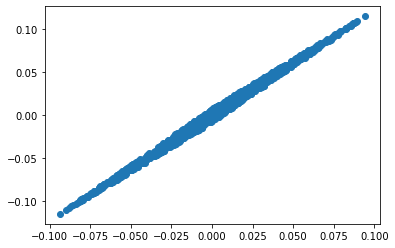

In [369]:
yf_vals=[]
yf_ang_vals=[]
for particle in swarm_initial:
    Xi=[particle.qi[1],particle.pi[1]/DEFAULT_ATOM_SPEED]
    yf,yf_ang=lattice.trace(Xi)
    yf_vals.append(yf)
    yf_ang_vals.append(yf_ang)
    plt.scatter(yf,yf_ang,c='C0')
plt.show()
yf_std_matrix,yf_ang_std_matrix=np.std(yf_vals),np.std(yf_ang_vals)

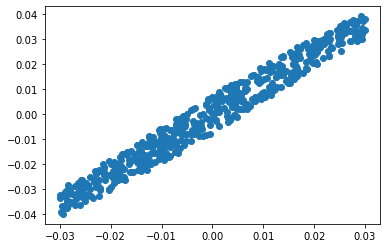

In [370]:
yf_vals=[]
yf_ang_vals=[]
for particle in swarm:
    if not particle.clipped:
        yf,yf_ang=particle.qf[1],particle.pf[1]/DEFAULT_ATOM_SPEED
        yf_vals.append(yf)
        yf_ang_vals.append(yf_ang)
        plt.scatter(yf,yf_ang,c='C0')
plt.show()
np.std(yf_vals),np.std(yf_ang_vals)
yf_std_sim,yf_ang_std_sim=np.std(yf_vals),np.std(yf_ang_vals)

In [337]:
matrix_lattice=Lattice()
rp=.03
L_drift=.05
matrix_lattice.add_drift(L_drift)
matrix_lattice.add_lens(.2,.5,rp)
matrix_lattice.add_drift(L_drift)
matrix_lattice.add_lens(.2,.5,rp)
matrix_lattice.add_drift(L_drift)

In [371]:
200**2/1.0

40000.0

In [385]:
import sympy as sym
m,vt,v0t,r,mu,B,rp,rb=sym.symbols(' m v_t v0_t r mu B r_p r_b',real=True,positive=True,nonzero=True)
vt=sym.sqrt(v0t**2 - 2*mu*B*(r-rb)**2/(rp**2*m))
func=2*mu*B*(r-rb)/rp**2 - m*vt**2/r
sym.simplify(sym.solve(func,r)[1])

3*r_b/4 + sqrt(B*mu*r_b**2 + 4*m*r_p**2*v0_t**2)/(4*sqrt(B)*sqrt(mu))

In [389]:
def r_offset(Bp,rp,rb,vt):
    term1=3*rb/4.0
    term2=Bp*SIMULATION_MAGNETON*rb**2
    term3=4*SIMULATION_MASS*(rp*vt)**2
    term4=4*sqrt(Bp*SIMULATION_MAGNETON)
    return term1+sqrt(term2+term3)/term4


1.0098556227351068

In [395]:
def r_offset_2(Bp,rp,rb,vt):
    term1=2*SIMULATION_MASS*(vt*rp)**2
    term2=SIMULATION_MAGNETON*Bp
    return .5*(rb+sqrt(rb**2+term1/term2))
r_offset_2(1.0,.02,1.0,200.0)

1.0099508695297033

In [396]:
r_offset_1(1.0,.02,1.0,200.0)-r_offset_2(1.0,.02,1.0,200.0)

-9.524679459649299e-05

In [183]:
from particle_class import Particle,Swarm
from particle_tracer import ParticleTracer
from ParticleTracerLatticeClass import ParticleTracerLattice
from swarm_tracer import SwarmTracer
PTL=ParticleTracerLattice(lattice_type='injector')
PTL.add_drift(L_drift-1.5*rp)
PTL.add_halbach_lens_sim(rp,.2)
PTL.add_drift(L_drift-1.5*rp)
PTL.add_halbach_lens_sim(rp,.2)
PTL.add_drift(L_drift-1.5*rp)
PTL.end_lattice()

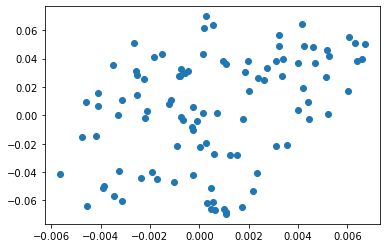

In [180]:
yf_vals=[]
yf_ang_vals=[]
for particle in swarm:
    yf,yf_ang=particle.qf[1],particle.pf[1]/DEFAULT_ATOM_SPEED
    yf_vals.append(yf)
    yf_ang_vals.append(yf_ang)
plt.scatter(yf_vals,yf_ang_vals)
plt.show()

In [143]:
def trace_to_s(s,X):
    assert 0.0<=s<=sum(lengths)
    el_index=np.argmax(s<length_cumulative)
    el=elements[el_index]
    delta_s=s-(length_cumulative[el_index]-lengths[el_index])
    if el_index==0:
        M=np.eye(2)
    else:
        M=full_transfer_matrix(elements[:el_index])
    M=el.M_func(delta_s)@M
    return M@X
s_vals=np.linspace(0.0,sum(lengths)-1e-3,1000)
X=np.array([.01,0.0])
Xf=np.array([trace_to_s(s,X) for s in s_vals])

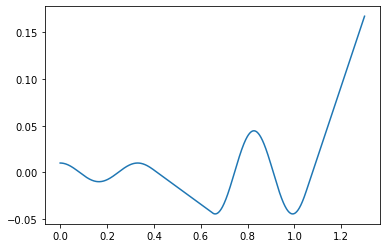

In [144]:

plt.plot(s_vals,Xf[:,0])
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from helper_tools import *
from KevinBumperClass import swarmShift_x
from storageRingModeler import StorageRingModel,make_optimal_solution_model
from particle_class import Swarm
model=make_optimal_solution_model('2',use_bumper=False)


In [14]:
from particle_class import Particle
from particle_tracer import ParticleTracer
pt=ParticleTracer(model.lattice_ring)
particle=Particle()
particle=pt.trace(particle,5e-6,3.0,fast_mode=False,use_energy_correction=True)

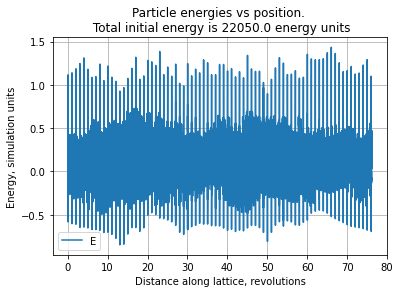

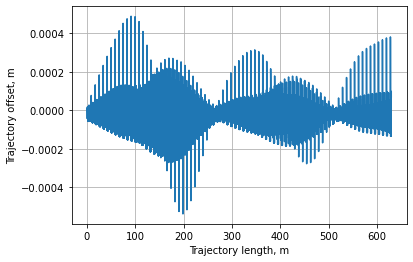

In [15]:
particle.plot_energies(show_only_total_energy=True)
particle.plot_orbit_reference_frame_position()

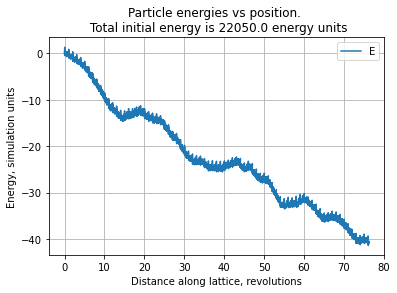

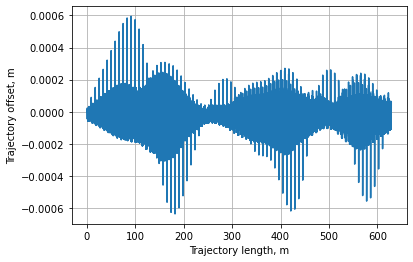

In [13]:
particle.plot_energies(show_only_total_energy=True)
particle.plot_orbit_reference_frame_position()

In [12]:
from scipy.signal import savgol_filter
speed=np.linalg.norm(particle.p_vals,axis=1)
print(np.nanmax(speed))
# plt.plot(speed)
speed=np.linalg.norm(particle.po_vals,axis=1)
print(np.nanmax(speed))
# plt.plot(speed)
# plt.show()

210.000005098867
210.000005098867


In [65]:
from math import ceil
from helper_tools import is_close_all
def combiner_x_interp_vals(x1: float,x2: float,x3: float,x4: float,delta_nominal: float)-> np.ndarray:
    """Make x values (through axis) of interpolation grid for combiner"""
    assert x1<x2<x3<x4 and 0<delta_nominal<x3-x2
    intervals_b=round((x3-x2)/delta_nominal)
    steps_b=intervals_b+1
    vals_b=np.linspace(x2,x3,steps_b) #todo: rename x_vals_a, etc
    delta_b=vals_b[1]-vals_b[0]
    vals_c=np.arange(x3,x4,delta_b)+delta_b
    vals_a=np.flip(np.arange(x2,x1,-delta_b))-delta_b
    vals=np.concatenate((vals_a,vals_b,vals_c))
    deltas=np.gradient(vals)
    is_close_all(deltas,delta_b,1e-12)
    assert vals[0]<x1 and vals[-1]>x4
    return vals


array([0.007408, 0.017696, 0.027984, 0.038272, 0.04856 , 0.058848,
       0.069136, 0.079424, 0.089712, 0.1     , 0.110288, 0.120576,
       0.130864, 0.141152, 0.15144 , 0.161728, 0.172016, 0.182304,
       0.192592, 0.20288 , 0.213168, 0.223456, 0.233744, 0.244032,
       0.25432 , 0.264608, 0.274896, 0.285184, 0.295472, 0.30576 ,
       0.316048, 0.326336, 0.336624, 0.346912, 0.3572  , 0.367488,
       0.377776, 0.388064, 0.398352, 0.40864 , 0.418928, 0.429216,
       0.439504])

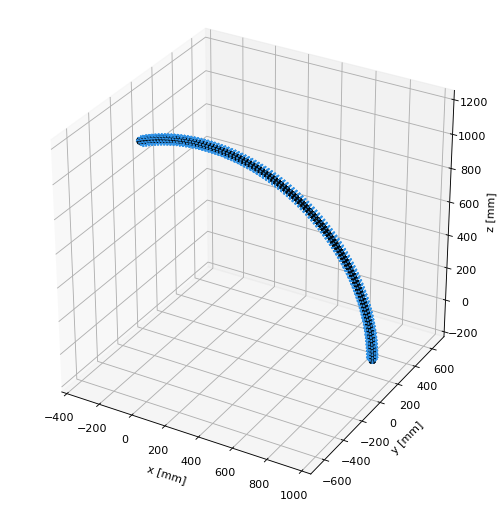

In [13]:
from HalbachLensClass import SegmentedBenderHalbach
import numpy as np
num_mags=100
bender=SegmentedBenderHalbach(.01,1.0,.01,.0254/2,"N52",num_mags,(True,True),use_pos_mag_angs_only=True)
bender.show()

In [9]:
import numpy as np

from particle_class import Particle
from particle_tracer import ParticleTracer
from ParticleTracerLatticeClass import ParticleTracerLattice
from swarm_tracer import SwarmTracer
import matplotlib.pyplot as plt
%matplotlib inline


PTL = ParticleTracerLattice(use_mag_errors=False,field_dens_mult=1,include_mag_cross_talk=True,include_misalignments=True)
PTL.add_drift(.25)
PTL.add_combiner_sim_lens(.2,.05)
PTL.add_drift(.25)
PTL.end_lattice()

st = SwarmTracer(PTL)
pt = ParticleTracer(PTL)
#0.8610285714285715


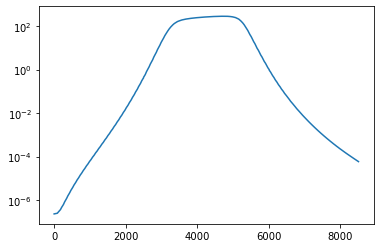

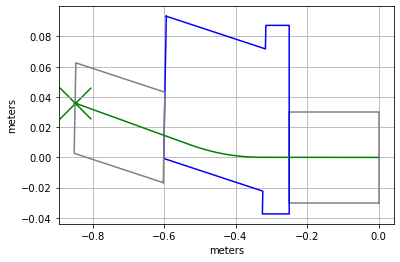

array([-8.48980572e-01,  3.59377276e-02, -1.25150307e-04])

In [10]:
particle = Particle(qi=np.array([-1e-10, 0e-3, 0.0]),pi=np.array([-200.0,0.0,0.]))
particle = pt.trace(particle, 5e-7, 1.0, fast_mode=False)
plt.semilogy(particle.V_vals)
plt.show()
PTL.show_lattice(particle=particle,true_aspect_ratio=False)
particle.qf

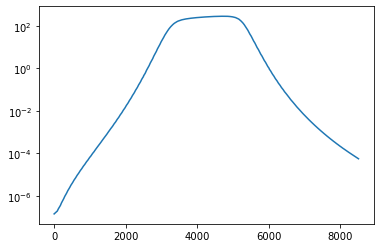

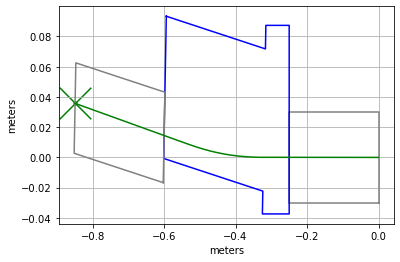

array([-8.49011725e-01,  3.57414938e-02, -5.97587160e-05])

In [6]:
particle = Particle(qi=np.array([-1e-10, 0e-3, 0.0]),pi=np.array([-200.0,0.0,0.]))
particle = pt.trace(particle, 5e-7, 1.0, fast_mode=False)
plt.semilogy(particle.V_vals)
plt.show()
PTL.show_lattice(particle=particle,true_aspect_ratio=False)
particle.qf

In [ ]:
from helper_tools import arr_product
magnet=PTL[1].magnet
x_vals=[PTL[1].L/2]
y_vals=np.linspace(-.05,.05)
coords=arr_product(x_vals,y_vals,y_vals)
valid_indices=magnet.get_valid_coord_indices(coords,1e-6,True)
for coord,is_valid in zip(coords,valid_indices):
    c='g' if is_valid else 'r'
    plt.scatter(coord[1],coord[2],c=c)
plt.show()

In [ ]:
particle = Particle(qi=np.array([-1e-10, 10e-3, 0.0]),pi=np.array([-10.0,0.0,0.]))
particle = pt.trace(particle, 5e-7, 1.0, fast_mode=False)
particle.plot_orbit_reference_frame_position()
PTL.show_lattice(particle=particle,true_aspect_ratio=False)

In [57]:
from latticeElements.Magnets import misalignment_transform_parameters
magnet.alignment_shifts=(0,0.0,0,.0,0.02)


def transform_coords_to_misaligned(coords,magnet):
    """Transform coords into the misalignment frame to ease analysis of wether they are valid.
    Go in reverse order of the misalignment procedure"""
    rotation_origin, R1, R2, r_shift=misalignment_transform_parameters(magnet)
    R1, R2=R1.as_matrix(), R2.as_matrix()
    coords-=r_shift
    coords=(coords-rotation_origin).T
    coords=np.linalg.inv(R2)@coords
    coords=np.linalg.inv(R1)@coords
    coords=coords.T+rotation_origin
    return coords


In [58]:
from helper_tools import arr_product
x_vals=np.linspace(0,PTL[1].L)
y_vals=np.linspace(0,PTL[1].rp*1.5)
coords=arr_product(x_vals,y_vals,y_vals)
indices=magnet.get_valid_coord_indices(coords,1e-6)

sum(indices)/len(indices)

0.76496

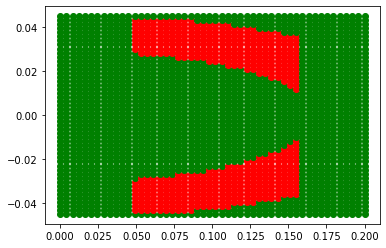

In [59]:

x_vals=np.linspace(0,PTL[1].L)
y_vals=np.linspace(-PTL[1].rp*1.5,PTL[1].rp*1.5)
z_vals=[0]
coords0=arr_product(x_vals,y_vals,z_vals)
coords=coords0
coords-=r_shift
coords=(coords-r_shift).T
coords=R2@coords
coords=R1@coords
coords=coords.T+r_shift
are_valid=magnet.get_valid_coord_indices(coords,1e-6)
for coord,is_valid in zip(coords0,are_valid):
    c='g' if is_valid else 'r'
    plt.scatter(coord[0],coord[1],c=c)
plt.show()

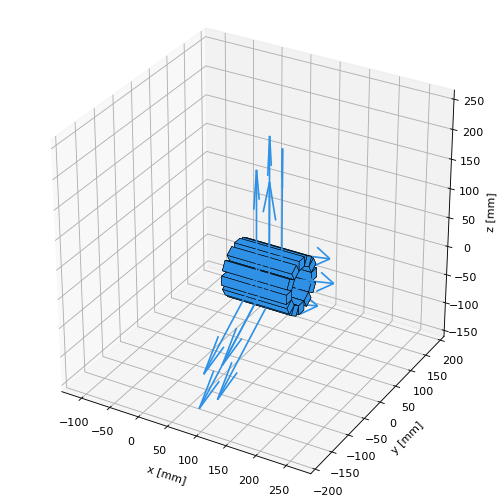

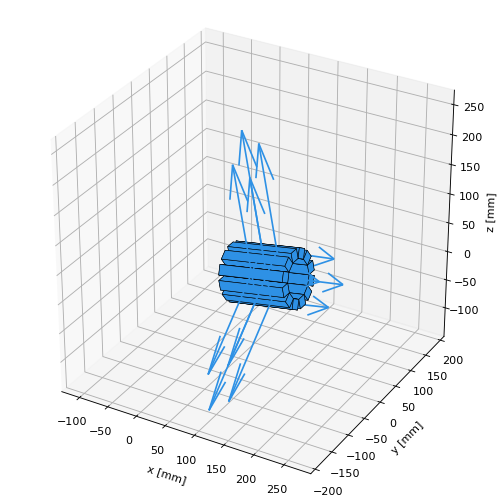

In [60]:
from shapely.geometry import box
from shapely.affinity import translate,rotate
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as Rot
import copy

magnet.make_magpylib_magnets(False,include_misalignments=False).show()
magnet.make_magpylib_magnets(False,include_misalignments=True).show()

In [23]:
numbers=[1,2,2,3,3,4,4,4,5]
numbers_unique=[]
for number in numbers:
    if number not in numbers_unique:
        numbers_unique.append(number)
numbers_unique

[1, 2, 3, 4, 5]

In [96]:
from constants import BOLTZMANN_CONSTANT, MASS_LITHIUM_7,BHOR_MAGNETON

V=600e-3*BOLTZMANN_CONSTANT

from math import asin,sin
asin(37.7/210)
rp=.05
delta=V/rp**2
theta=.18/1.44
s=210.0
L=((V-.5*MASS_LITHIUM_7*(theta*s)**2)/(delta*theta**2))**.5
L

0.2871810983873865

In [97]:
import sympy as sym
phi=sym.symbols('phi', real=True)
alpha, r, theta, theta_0,F0,D,L=sym.symbols('alpha r theta theta_0 F0 D L', real=True,positive=True)
# alpha=1
f=sym.cos(theta*alpha)**2 / r**2
da=r**2*sym.sin(theta)
integrand=f*da
theta_max=(sym.pi/2)/alpha
integral=sym.integrate(integrand,(theta,0,theta_max),(phi,0,2*sym.pi)  ).args[1][0]
# Flux
sigma=1/integral.simplify()
Flux_theta=sym.integrate(F0*sigma*integrand,(theta,0,theta_0),(phi,0,2*sym.pi)  ).args[1][0]

In [177]:
import numpy as np
import matplotlib.pyplot as plt
f=sym.cos(theta*alpha)**2 / r**2
da=r**2*sym.sin(theta)
integrand=f*da
theta_max=(sym.pi/2)/alpha
def integrate(limit):
    return 1/(sym.integrate(integrand,(theta,0,theta_max)).args[0][0].subs(alpha,limit))
limits=np.linspace(1,1.2,30)
# vals=[integrate(limit) for limit in limits]
float(integrate(1.2))

4.19530687022535

In [194]:
L=16
D=2.54
gamma=3.57
frac=1e2*(gamma/2)*((D/2)/L)**2
frac

1.1246197265625

In [ ]:
1.94*.01**2

In [171]:
thing=sym.integrate(integrand,(theta,0,theta_max)).args[0][0]
sym.simplify(sym.series(thing,alpha,1,2).removeO())

(4 - 3*pi)*(alpha - 1)/9 + 1/3

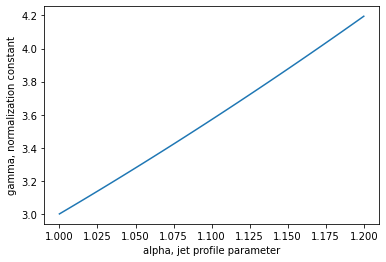

In [163]:
plt.plot(limits,vals)
plt.ylabel('gamma, normalization constant')
plt.xlabel('alpha, jet profile parameter')
plt.show()

In [123]:
Flux=sym.series(Flux_theta,theta_0,0,3).removeO()#.subs(theta_0,(D/2)/L)
# sym.N(Flux.subs(L,2.0).subs(alpha,1.15).subs(D,1e-3).subs(F0,.0125*60))
# Flux.subs(alpha,1.0)
display(Flux.subs(alpha,1))
# Flux=sym.series(Flux_theta,theta_0,0,3).removeO().subs(theta_0,(D/2)/L).subs(alpha,1)
Flux.subs(alpha,1)#.subs(theta_0,(D/2)/L)

2*F0*theta_0**2/3

2*F0*theta_0**2/3

In [28]:
from HalbachLensClass import HalbachLens
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
L0=6*.0254
mag_widths=(.0254,1.5*.0254)
radii=(.05,.05+mag_widths[0])
lens=HalbachLens(radii, mag_widths,L0,'N52')
# lens.show()
dx=1e-6
q0=np.array([0.0,0,0])
lens.B_norm_grad(q0,diff_method='central',dx=dx)
# q1=np.array([0.0,dx,0.0])
# q2=np.array([0.0,-dx,0.0])
# lens.B_norm(q1)-lens.B_norm(q2)

0
[[1.e-06 0.e+00 0.e+00]]
[4.86057422e-10]
[[-1.e-06  0.e+00  0.e+00]]
[4.86058328e-10]
[-9.05942146e-16] 2e-06
1
[[0.e+00 1.e-06 0.e+00]]
[4.86058052e-10]
[[ 0.e+00 -1.e-06  0.e+00]]
[4.86058624e-10]
[-5.71986478e-16] 2e-06
2
[[0.e+00 0.e+00 1.e-06]]
[5.03475788e-16]
[[ 0.e+00  0.e+00 -1.e-06]]
[5.03475788e-16]
[0.] 2e-06


array([-4.52971073e-10, -2.85993239e-10,  0.00000000e+00])

In [41]:
q0=np.array([0.0,0,0])
lens.B_norm(q0)

2.7173034561617646e-16

1e-20

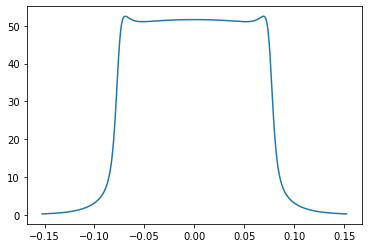

7.782067296936666

In [3]:
num_points=1000
x0=.045/1.41
y0=0.045/1.41
z_vals=np.linspace(-L0,L0,num_points)
coords=np.column_stack((np.ones(num_points)*x0,np.ones(num_points)*y0,z_vals))
F_trans=np.linalg.norm(lens.B_norm_grad(coords)[:,:2],axis=1)
plt.plot(z_vals,F_trans)
plt.show()
F0=F_trans[round(len(z_vals)/2)]
L=np.trapz(F_trans,x=z_vals)/F0
1e2*(L-L0)/L0

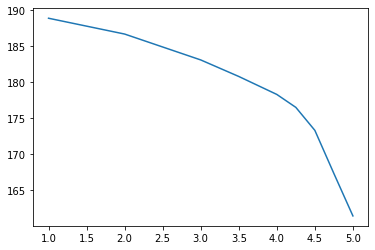

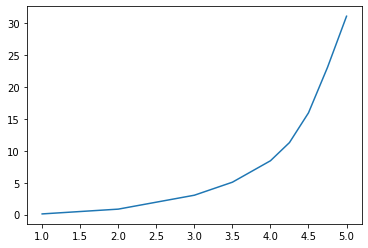

In [5]:
from helper_tools import make_dense_curve_1D_RBF
ap=np.array([5.0,4.75,4.5,4.25,4,3.5,3,2,1])
loc=np.array([161.4,167.3,173.3,176.5,178.3,180.8,183.1,186.7,188.9])
size=np.array([31.09,23.08,15.95,11.29,8.44,5.08,3.04,.86,.11])
plt.plot(ap,loc)
plt.show()
plt.plot(ap,size)
plt.show()
np.savetxt("apdata2",np.column_stack((ap,loc,size)))

In [39]:
def convert_file_to_lower_case_words(file_name):
    file=open(file_name)
    #do the splitting and lowercasing here
    pass
def make_script_list(file_name):
    words=convert_file_to_lower_case_words(file_name)
    script_list=[]
    for word in words:
        if word not in script_list:
            script_list.append(word)
    return script_list
def num_occurences_in_word(word, sub_string):
    # count the occurences of the sub_string in word
    pass
def num_occurences_in_words(words,sub_string):
    # count the occurences of the sub_string in words
    counts=0
    for word in words:
        counts+= num_occurences_in_word(word, sub_string)


b b
r r
a a
v v
o o
a a
l l
p p
h h
a a
z z
u u
l l
u u
c c
h h
a a
r r
l l
i i
e e


In [35]:
fruits=['apple','orange']
veggies=['carrot','spinach']
for thing in fruits:
    for thing in veggies:
        print(thing)

carrot
spinach
carrot
spinach


In [64]:
letter_to_count='a'
word='fataass'
index=0
counts=0
while index!=-1:
    index=word.find(letter_to_count,index+1)
    counts+=1
counts

4

In [65]:
letter_to_count='a'
word='fataass'
from_index=0
letter_index=None
counts=0
while letter_index!=-1:
    letter_index=word.find(letter_to_count,from_index)
    from_index=letter_index+1
    counts+=1
counts

4

In [74]:
word='fataass'
letter='a'
letter_index=word.find('a')
print(letter_index)
letter_index=word.find('a',letter_index+1)
print(letter_index)
letter_index=word.find('a',letter_index+1)
print(letter_index)

letter_index=word.find('a',letter_index+1)
print(letter_index) #OH! it's -1, that means it's done! no more letters. We counted 3

1
3
4
-1


In [76]:
letters=['a','b','c','d','e','f']
stop_letter='d'
index=0
while stop_letter!=letters[index]:
    print(letters[index])
    index+=1

a
b
c


In [58]:
from constants import BOLTZMANN_CONSTANT,MASS_LITHIUM_7
sigma=5e-13 #cm^2
T=.01
flux_mult=1
F=5e16
forward_speed=210.0 * 1e2 #cm/ s
bore_radius=.7
area=np.pi*bore_radius**2
density=flux_mult*F/(forward_speed*area)
speed=np.sqrt(8*BOLTZMANN_CONSTANT*T/MASS_LITHIUM_7)
tau=1/(np.sqrt(2)*speed*density*sigma)
100/tau

1064.895256136423

In [4]:
import numpy
from PIL import Image, ImageDraw

# polygon = [(x1,y1),(x2,y2),...] or [x1,y1,x2,y2,...]
width = 100
height = 100


# ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)

[10000,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


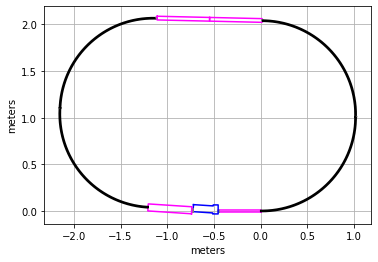

In [48]:
lattice_ring=model.lattice_ring
lattice_ring.show_lattice()

In [51]:
for el in lattice_ring:
    print(type(el).__name__,round(100*el.L),round(100*el.ap,1))

HalbachLensSim 44 0.9
Drift 1 1.0
CombinerLensSim 27 3.8
Drift 2 1.8
HalbachLensSim 47 3.8
BenderSim 155 0.7
Drift 0 0.8
BenderSim 154 0.7
Drift 1 0.8
HalbachLensSim 56 2.0
HalbachLensSim 56 2.0
Drift 1 0.8
BenderSim 157 0.7
Drift 0 0.8
BenderSim 157 0.7


In [97]:
from helper_tools import *
from magpylib.magnet import Cuboid
from constants import MAGNETIC_PERMEABILITY
mTESLA_TO_TESLA = 1e-3
mm_to_meter=1e-3
magpyMagnetization_ToSI: float = 1 / (1e3 * MAGNETIC_PERMEABILITY)
SI_MagnetizationToMagpy: float = 1 / magpyMagnetization_ToSI

mag_dim_mm=(10,10,10)
M=1e6
magnetization=(M*SI_MagnetizationToMagpy,0,0)
magnet = Cuboid(magnetization=magnetization, dimension=mag_dim_mm,
             position=(0,0,0))
coil_diam_mm=12
N=100


def flux(delta_x):
    coil_y_coords=np.linspace(-coil_diam_mm/2,coil_diam_mm/2,100)
    coil_area_coords=arr_product([delta_x],coil_y_coords,coil_y_coords)
    coil_area_coords=coil_area_coords[np.linalg.norm(coil_area_coords[:,1:],axis=1)<coil_diam_mm/2]
    da=N*(mm_to_meter*(coil_y_coords[1]-coil_y_coords[0]))**2
    print(da*len(coil_area_coords))
    B_x=magnet.getB(coil_area_coords)[:,0]*mTESLA_TO_TESLA
    return np.sum(B_x*da)

emf_time_mv=1e3*(flux(0)-flux(50))
emf_time_mv

0.01126611570247932
0.01126611570247932


8.22918124841902

In [72]:
from ParticleTracerLatticeClass import ParticleTracerLattice
PTL=ParticleTracerLattice(lattice_type='injector')
r_inner=5.0
r_outer=r_inner
PTL.add_drift()

0.000176625

In [23]:
#todo: add pressure profile business
#todo: add aperture?
#todo: add constant pressure chamber?

2.482000201450435e-05

In [ ]:
from vacuumanalyzer.vacuumanalyzer import VacuumSystem,solve_vac_system
from math import sqrt
def conductance_aperture(D,m,T=293.0):
    return 2.9*sqrt(T/m)*D**2
P0=1e-6
Q=P0*conductance_aperture(1,4)
vac_sys=VacuumSystem()
vac_sys.add_chamber(Q=Q)
vac_sys.add_tube(32,2.2)
vac_sys.add_chamber(S=100)
vac_sys.add_tube(15,1.7)
vac_sys.add_chamber(S=100)
vac_sys.add_tube(20,2)
# vac_sys.add_chamber(S=100)
vac_sys.add_tube(40,2.5)
vac_sys.add_chamber(S=100)
# vac_sys.add_tube(25,1.3)
solve_vac_system(vac_sys)
print(vac_sys.chambers()[-1])

In [100]:
k=1.38e-23
P=1.3332e-7
n=P/(k*300)
(n*1e-6)/1e6

32.20289855072463

In [108]:
P=1.7e-10 * 133
n=P/(k*300)
(n*1e-6)*6e-9
(1e-6*P/(k*300))/1e6

5.461352657004831

In [125]:
(1.5e-15/(k*300/(80*133)))/1e9,(6e-15/(k*300/(80*133)))/1e10
(1/1.5e10)

6.666666666666667e-11

In [5]:
%matplotlib tk
model.show_floor_plan_with_trajectories(T_max=.01)

In [8]:
%matplotlib tk
from helper_tools import plt
from particle_tracer import ParticleTracer
from swarm_tracer import SwarmTracer
PTL=model.lattice_injector
x,y,_=PTL.combiner.r1
# st=SwarmTracer(PTL)
# swarm=st.initialize_simulated_collector_focus_swarm(100)
# swarm=st.trace_swarm_through_lattice(swarm,1e-5,1.,use_fast_mode=False)
pt=ParticleTracer(PTL)
particle=pt.trace(None,1e-5,.01)
PTL.show_lattice(particle=particle,plot_inner=True,plot_outer=True,show_immediately=False)
# plt.scatter(x,y,marker='o',s=100)
plt.show()

# PTL.show_lattice(particle=particle)



In [17]:
print(model.lattice_injector.combiner.input_offset,model.lattice_ring.combiner.input_offset)
print(model.lattice_injector.combiner.ang,model.lattice_ring.combiner.ang)
print(model.lattice_injector.combiner.Lm,model.lattice_ring.combiner.Lm)
print(model.lattice_injector.combiner.input_offset-model.lattice_ring.combiner.input_offset)
print(model.lattice_injector.combiner.rp,model.lattice_ring.combiner.rp)
print((model.lattice_injector.combiner.input_offset+model.lattice_ring.combiner.input_offset)/2)

-0.029964116352615842 -0.016662352428343963
-0.08491247104692867 0.07079696627006075
0.17047182734978528 0.17047182734978528
-0.013301763924271879
0.04 0.04
-0.0233132343904799


In [2]:
L1=model.lattice_ring.el_list[1].L
L1+=model.lattice_ring.el_list[0].fringe_frac_outer*model.lattice_ring.el_list[0].rp
L1+=model.lattice_ring.combiner.space
# L1
%matplotlib tk
model.show_floor_plan()
L1

0.08889999999999999

In [1]:
from ParticleTracerLatticeClass import ParticleTracerLattice
from helper_tools import *
PTL=ParticleTracerLattice(lattice_type='injector')
PTL.add_drift(.1)
PTL.add_drift(.1,input_tilt_angle=.1,output_tilt_angle=-.2)
PTL.add_drift(.1,output_tilt_angle=.1)
PTL.add_combiner_sim_lens(.2,.02)
PTL.end_lattice()

# PTL.show_lattice()


In [4]:
from latticeElements.combiner_characterizer import  make_halbach_combiner_force_function,compute_particle_trajectory
from latticeElements.elements import Drift,HalbachLensSim,CombinerLensSim

def combiner_Halbach_xy(el):
    atom_state = 'HIGH_FIELD_SEEKER' if el.field_fact == -1 else 'LOW_FIELD_SEEKER'
    force_Func = make_halbach_combiner_force_function(el)
    q_arr, _ = compute_particle_trajectory(force_Func, el.PTL.speed_nominal, 0.0, 2 * el.space + el.Lm,
                                          particle_y_offset_start=el.output_offset, atom_state=atom_state)
    xy=q_arr[:,:2]
    for i,coord in enumerate(xy):
        xy[i]=el.R_Out@coord
    xy+=el.r2[:2]
    return xy

def straight_xy(el):
    xy=np.array([[0.0,0.0],[el.L,0.0]])
    for i,coord in enumerate(xy):
        xy[i]=el.R_Out@coord
    xy+=el.r1[:2]
    return xy

In [6]:
%matplotlib tk


el=PTL.el_list[0]
def make_Particle_Trajectory(el):
    if type(el) in (Drift,HalbachLensSim):
        xy=straight_xy(el)
    else:
        xy=combiner_Halbach_xy(el)

    xy_plot_format=list(xy.T)
    return xy_plot_format


PTL.show_lattice(show_immediately=False)
for el in PTL.el_list:
    plt.plot(*make_Particle_Trajectory(el))

In [10]:
from latticeElements.utilities import halbach_magnet_width
from helper_tools import inch_to_meter
import numpy as np
halfAngle = 2 * np.pi / 24
magnet_width=inch_to_meter(3/16)
print(magnet_width)
magnetSeparation=inch_to_meter(.005)
# maxMagnetWidth = rp * np.tan(halfAngle) * 2
widthReductin = magnetSeparation / np.cos(halfAngle)
# magnet_width -= widthReductin

rp=inch_to_meter(5/8)/2.0
(halbach_magnet_width(rp)/.0254)/(1/16)

0.004762499999999999


2.516456305349009

In [48]:
from helper_tools import *
from math import floor





16.000000000001


0.0254

In [ ]:
np.arange(1,16)


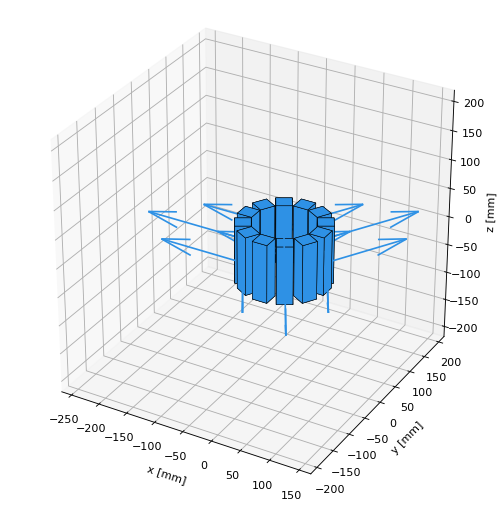

In [3]:
from HalbachLensClass import HalbachLens
lens=HalbachLens(.05,.025,.1,'N52')
lens.show()
lens.B_vec()

In [16]:
sources=lens2.sources_all
Collection([*lens1.copy().sources_all,*sources],override_parent=True)

Collection(id=6085426240)

In [42]:
class foo:
    def __init__(self):
        pass
    @staticmethod
    def a(b):
        return b+5.0
foo.a(1.0)

6.0

In [61]:
from constants import MAGNETIC_PERMEABILITY
lam=.0005/MAGNETIC_PERMEABILITY
r=500e-6
sigma=lam*2*r/(np.pi*(1e3*r)**2)
sigma

0.506605917935905

In [247]:
swarmSystemTraced=Swarm()
for particleInjector,particle_ring in zip(swarm_injector_traced.particles,swarmRingTraced.particles):
    assert particleInjector.traced is True
    particle=Particle(qi=particleInjector.qi,pi=particleInjector.pi)
    particle.traced=True
    didParticleInjectorClip=particleInjector.clipped or model.does_ring_clip_injector_particle(particleInjector)
    if didParticleInjectorClip:
        particle.clipped=didParticleInjectorClip
    else:
        particle.T=particleInjector.T+particle_ring.T
        particle.clipped=particle_ring.clipped
    swarmSystemTraced.add(particle)
len(swarmSystemTraced.particles)

4995

-0.002004008016032177 -0.002004008016032177


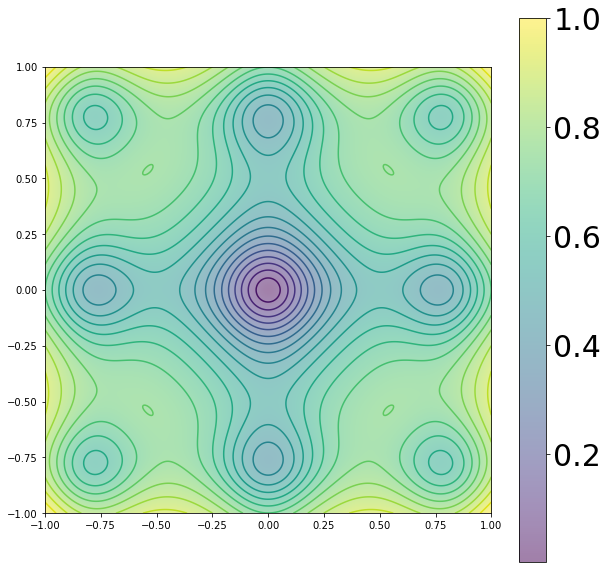

In [140]:
from helper_tools import *
xEdge=np.linspace(-1,1,500)
yEdge=np.linspace(-1,1,500)
X,Y=np.meshgrid(xEdge,yEdge)
x_arr=np.ravel(X)
y_arr=np.ravel(Y)
np.random.seed(42)
def func(x,y):
    x=1.25*x
    y=1.25*y
    arg1 = -0.2 * np.sqrt(0.5 * (x ** 2 + y ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x) + np.cos(2. * np.pi * y))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e+np.random.random_sample()*.0
v=np.array([func(x,y) for x,y in zip(x_arr,y_arr)])
v/=v.max()
print(x_arr[np.argmin(v)],y_arr[np.argmin(v)])
v=v.reshape((len(yEdge),len(xEdge)))
plt.figure(figsize=(10,10))
plt.imshow(v,alpha=0.5,extent=[xEdge.min(),xEdge.max(),yEdge.min(),yEdge.max()])
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=30)
plt.contour(X,Y,v,20)

plt.show()

In [178]:
import matplotlib
xEdge=np.linspace(0,1.5,200)
yEdge=np.linspace(0,1.5,200)
X,Y=np.meshgrid(xEdge,yEdge)
x_arr=np.ravel(X)
y_arr=np.ravel(Y)
np.random.seed(42)
a,b=1,100
def func(x,y):
    return ((a-x)**2+b*(y-x**2)**2)*(1+np.random.random_sample()*.5)
v=np.array([func(x,y) for x,y in zip(x_arr,y_arr)])
v[v<1e-6]=1e-6
# v=np.log10(v)
v=v.reshape((len(yEdge),len(xEdge)))
plt.figure(figsize=(10,10))
plt.imshow(v,alpha=0.5,extent=[xEdge.min(),xEdge.max(),yEdge.min(),yEdge.max()],norm=matplotlib.colors.LogNorm())
cbar=plt.colorbar()
# cbar.ax.tick_params(labelsize=30)
# plt.contour(X,Y,v,20)

plt.show()
v.min()

0.0007680184177805239

In [175]:
from octopusOptimizer import octopus_Optimize
a,b=1,100
def func(args):
    x,y=args
    return (a-x)**2+b*(y-x**2)**2+np.random.random_sample()*.5
xi=[0,0]
bounds=[(-5,5),(-5,5)]
octopus_Optimize(func,bounds,xi,processes=1)

best of iter: 0 1.1494560206022082 array([0, 0])
didnt find food
best of iter: 1 1.1494560206022082 array([0, 0])


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


found food
best of iter: 2 0.9405631251866033 array([ 0.1       , -0.00869327])
found food
best of iter: 3 0.8455703375406206 array([ 0.10196765, -0.00842964])
didnt find food
best of iter: 4 0.8455703375406206 array([ 0.10196765, -0.00842964])
didnt find food
best of iter: 5 0.8455703375406206 array([ 0.10196765, -0.00842964])
found food
best of iter: 6 0.8389334718944604 array([0.10055483, 0.00042187])
didnt find food
best of iter: 7 0.8389334718944604 array([0.10055483, 0.00042187])
didnt find food
best of iter: 8 0.8389334718944604 array([0.10055483, 0.00042187])
didnt find food
best of iter: 9 0.8389334718944604 array([0.10055483, 0.00042187])
didnt find food
best of iter: 10 0.8389334718944604 array([0.10055483, 0.00042187])


KeyboardInterrupt: 

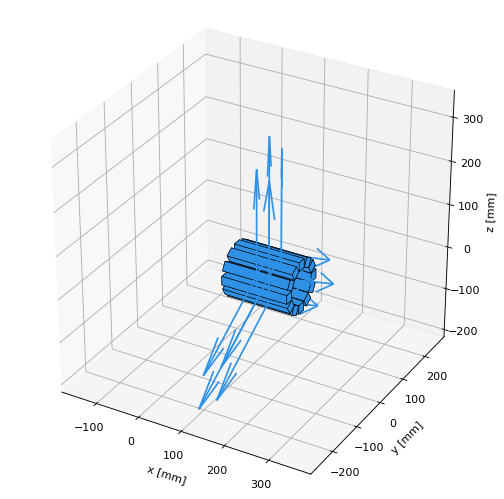

In [2]:
from latticeElements.combiner_characterizer import compute_particle_trajectory
from HalbachLensClass import HalbachLens
from helper_tools import *
from scipy.spatial.transform import Rotation as Rot
%matplotlib inline
from constants import SIMULATION_MAGNETON
rp=.04
Lm=.15
space=1.5*rp
def make_Combiner_Force_And_Energy_Function():
    orientation=Rot.from_rotvec([0,np.pi/2,0.0])
    lens=HalbachLens(rp,rp/2.0,Lm)
    lens.rotate(orientation)
    lens.move((space+Lm/2,0,0))
    lens.show()
    def force(q):
        F=-SIMULATION_MAGNETON*lens.B_norm_grad(q)
        F[2]=0.0
        return F
    def energy(q):
        return lens.B_norm(q)*SIMULATION_MAGNETON
    return force, energy
force,energ=make_Combiner_Force_And_Energy_Function()

In [35]:
from HalbachLensClass import HalbachLens
from helper_tools import inch_to_meter,arr_product,make_image_cartesian
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as Rot
r_inner=inch_to_meter(.952)
width_inner=inch_to_meter(.5)
width_outer=inch_to_meter(.75)
r_outer=inch_to_meter(1.463)
length=inch_to_meter(7.875)
lens=HalbachLens((r_inner,),(width_inner,),length,'N52')
R=Rot.from_rotvec([0,0,np.pi/6])
lens.rotate(R)
# lens.move((.05,0.08,0))


%matplotlib tk
# lens.show()

x_max=r_outer+width_outer*1.5
x_arr=np.linspace(-x_max,x_max,300)
z_list=[0]
coords=arr_product(x_arr,x_arr,z_list)
By=lens.B_vec(coords)[:,1]
image=By.reshape(len(x_arr),len(x_arr))
image=np.rot90(image)
plt.imshow(image)
plt.colorbar()
plt.show()

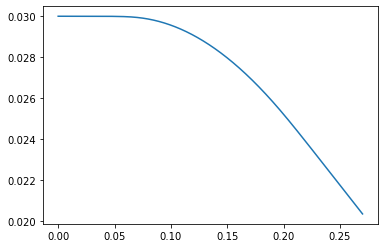

-0.07035747136998269

In [11]:
q_arr,p_arr=compute_particle_trajectory(force,210.0,0,Lm+2*space,particle_y_offset_start=-3e-2)
angle=np.tan(p_arr[-1][1]/p_arr[-1][0]) #-0.02339164110843338
plt.plot(q_arr[:,0],q_arr[:,1])
plt.show()
angle

In [13]:
wallThickness=1e-3
ap=.8*rp
lensCorner=np.array([space+Lm+wallThickness,-ap,0.0])
np.min(np.linalg.norm(q_arr-lensCorner,axis=1))

0.056338396476225405

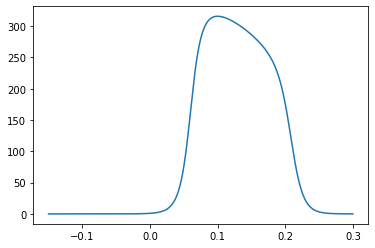

In [62]:
E=energy(q_arr)
plt.plot(q_arr[:,0],E)
plt.show()

In [63]:
EStart=E[np.argmax(q_arr[:,0]>0)]
xEndEqualEnergy=q_arr[:,0][np.argmax(q_arr[:,0]>L+2*space)]
# E[len(E)-np.argmax(np.flip(E)>EStart)]
xEndEqualEnergy,L+2*space

(0.2701963532644307, 0.27)

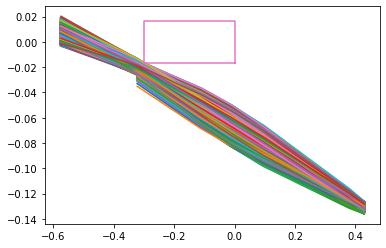

(108.3921891424954, 271.36403180203695)

In [4]:
%matplotlib inline
swarm=model.trace_through_injector_and_transform_to_ring(False)
swarm.num_particles(weighted=True),model.swarm_injector_initial.num_particles(weighted=True) #(116.35938725733523, 271.36403180203695)

In [3]:
swarm_injector_traced = model.swarm_tracer_injector.trace_swarm_through_lattice(
    model.swarm_injector_initial.quick_copy()
    , model.h, 1.0, parallel=False, copy_swarm=False,
    accelerated=False,log_el_phase_space_coords=True)

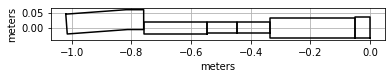

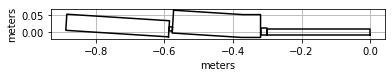

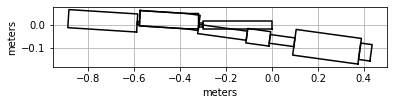

In [4]:
model.lattice_injector.show_lattice()
model.lattice_ring.show_lattice()
model.show_floor_plan()

In [23]:
from skopt import Optimizer
import numpy as np
from helper_tools import low_discrepancy_sample
import time
def func(X):
    return np.exp(np.linalg.norm(X))+np.sin(3*X[0]+np.pi/.53243)+np.cos(X[1])-np.sin(2*X[2])
bounds=[(-1.0,1.0),(-1.,1.0),(-1.0,1.0)]
_initCoords=low_discrepancy_sample(bounds,1_000_000)
_vals=[func(coord) for coord in _initCoords]
x_min=_initCoords[np.argmin(_vals)]
valMin=np.min(_vals)
x_min,valMin

(array([-0.29231071,  0.01222432,  0.40662479]), 0.9716902150985816)

In [55]:

initCoords=low_discrepancy_sample(bounds,200)
vals=[func(coord) for coord in initCoords]
initCoords=[list(coord) for coord in initCoords]
t=time.time()
opt=Optimizer(bounds,base_estimator='GP',acq_func='EI')
for _ in range(1):
    opt.tell(initCoords,vals)
    xTest=opt.ask()
    initCoords.append(xTest)
    val=func(np.array(xTest))
    print(val)
    vals.append(val)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


0.9746299224850333


In [8]:
from constants import SIMULATION_MAGNETON
import numpy as np
from math import sqrt,cos,sin
class Lens:
    def __init__(self,Bp,rp,L,speed_nominal):
        K=sqrt(2*SIMULATION_MAGNETON*Bp/(speed_nominal*rp)**2)
        self.M=np.array([[cos(K*L),sin(K*L)/K],[-K*sin(K*L),cos(K*L)]])
class Drift:
    def __init__(self,L):
        self.M=np.array([[1.0,L],[0.0,1.0]])
lens=Lens(1.0,.01,.1,210.0)
drift=Drift(.05)
X=[.005,0.0]
M=lens.M@drift.M
for _ in range(10):
    X=M@X


[-0.00161658 -0.08989898]
[-0.00250138  0.13894987]
[ 0.00548276 -0.12486505]
[-0.00597291  0.05404434]
[0.00374909 0.04133291]
[ 0.00017822 -0.11792941]
[-0.00402456  0.14094142]
[ 0.00604223 -0.0999128 ]
[-0.00531444  0.01348604]
[0.00217189 0.07906847]


94

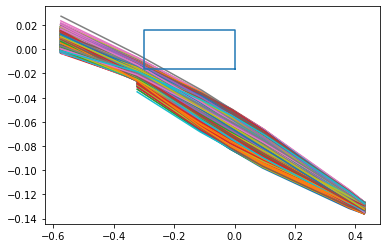

In [6]:
from shapely.geometry import LineString


def convert_position_injector_to_ring_frame(X):
    X=X[:2].copy()
    X+=-model.lattice_injector.combiner.r2[:2]
    X=model.lattice_injector.combiner.R_In@model.lattice_injector.combiner.R_In@X
    X+=model.lattice_ring.combiner.r2[:2]
    return X

def line_In_ring_frame_from_injector_particle(particle)->Optional[LineString]:
    if len(particle.el_phase_space_log)==0:
        return None
    qList=[]
    for q,p in particle.el_phase_space_log:
        qRingFrame_2D=convert_position_injector_to_ring_frame(q)
        qList.append(qRingFrame_2D)
    line=LineString(qList)
    return line

def does_ring_clip_injector_particle(particle):
    line=line_In_ring_frame_from_injector_particle(particle)
    lens=model.lattice_ring.el_list[0]
    assert len(model.lattice_ring.el_list)==5 and type(lens) is HalbachLensSim
    return line.intersects(lens.SO_outer)

clipped=0
for particle in swarm_injector_traced.particles:
    line=line_In_ring_frame_from_injector_particle(particle)
    plt.plot(*line.coords.xy)
    # model.show_floor_plan()
    # line.intersects(model.lattice_ring.el_list[0].SO_outer)
    clipped+=does_ring_clip_injector_particle(particle)
plt.plot(*model.lattice_ring.el_list[0].SO_outer.exterior.xy)
clipped

In [1]:
from helper_tools import *
from latticeElements.utilities import ElementTooShortError
from latticeModels import make_ring_and_injector, RingGeometryError, InjectorGeometryError
from latticeModels_Parameters import optimizerBounds_V1_3,injectorParamsOptimalAny
from storageRingModeler import StorageRingModel
from optimizer import Solver

params=(0.021678111714888558, 0.01 , 0.03999899762130617 ,0.007616470202968745, 0.4484421625888025  , 0.49306469260734515 )

has_bumper=False
system_params=[params,tuple(injectorParamsOptimalAny.values())]

lattice_ring, lattice_injector = make_ring_and_injector(system_params,'3',options={'use_solenoid_field': True,'has_bumper': has_bumper})
model = StorageRingModel(lattice_ring, lattice_injector,has_bumper=has_bumper)
model.mode_match()

In [8]:
'a'

'a'

In [7]:
#(0.7243036492975127, 86.62969974111866)
%matplotlib tk
# model.show_floor_plan_with_trajectories()
model.mode_match() #(1.8180463499879218, 57.173734897771034)

(0.7882430184203559, 66.56575763267496)

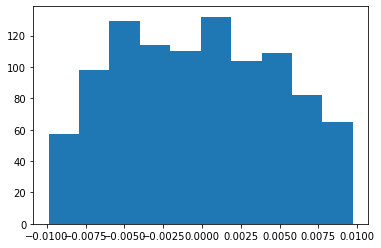

In [101]:
def timestep_particle_to_zero(particle):
    startX=-1e-10
    dx=startX-particle.qi[0]
    dt=dx/particle.pi[0]
    particle.qi+=dt*particle.pi
def displace_swarm(swarm,dx,dy,dz,move_to_zero=True):
    delta=np.array([dx,dy,dz])
    for particle in swarm:
        particle.qi+=delta
        if move_to_zero:
            timestep_particle_to_zero(particle)
def rotate_swarm_momentum(swarm,angle_y,angle_z):
    Rz=Rot.from_rotvec([0,0,angle_z]).as_matrix()
    Ry=Rot.from_rotvec([0,angle_y,0]).as_matrix()
    for particle in swarm:
        particle.pi=Rz@particle.pi
        particle.pi=Ry@particle.pi
    return swarm

def solve_Jittered_Swarm(dx,dy,dz,angle_y,angle_z):
    model=StorageRingModel(lattice_ring,lattice_injector)
    displace_swarm(model.swarm_injector_initial,dx,dy,dz)
    rotate_swarm_momentum(model.swarm_injector_initial,angle_y,angle_z)
    return model.mode_match()
def make_increasing_3D_arr_along_axis(amplitude,length,axis):
    arr=np.zeros((length,3))
    arr[:,axis]=np.linspace(-amplitude,amplitude,length)
    return arr
def make_random_arr(amplitude,length):
    return amplitude*2*(np.random.random(length)-.5)
def make_random_arr_in_circle(radius,num):
    samples=[]
    while len(samples)<num:
        x,y=make_random_arr(radius,2)
        if np.sqrt(x**2+y**2)<=radius:
            samples.append((x,y))
    return np.array(samples)

def make_misalignment_params(delta_x_max,delta_r_max,angle_max,num):
    shifts_x=make_random_arr(delta_x_max,num)
    shifts_y,shifts_z=make_random_arr_in_circle(delta_r_max,num).T
    rotsY,rotsZ=make_random_arr_in_circle(angle_max,num).T
    params=np.column_stack((shifts_x,shifts_y,shifts_z,rotsY,rotsZ))
    return params


In [1]:
from constants import GRAVITATIONAL_ACCELERATION
T=swarm.particles[0].T
z=swarm.particles[0].qf[2]
.5*GRAVITATIONAL_ACCELERATION*T**2

NameError: name 'swarm' is not defined

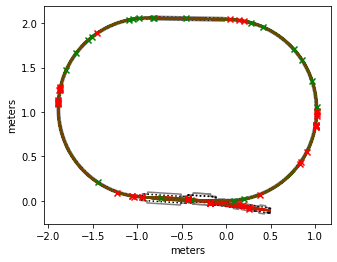

In [16]:
from latticeElements.elements import Drift,HalbachLensSim
def get_element_before_and_after(el_center,lattice):
    if (el_center.index == len(lattice.el_list) - 1 or el_center.index == 0) and lattice.lattice_type == 'injector':
        raise Exception('Element cannot be first or last if lattice is injector type')
    el_before_index = el_center.index - 1 if el_center.index != 0 else len(lattice.el_list) - 1
    el_after_index = el_center.index + 1 if el_center.index < len(lattice.el_list) - 1 else 0
    el_before = lattice.el_list[el_before_index]
    el_after = lattice.el_list[el_after_index]
    return el_before, el_after
def move_Injector_Element_Longitudinally(el_center,deltaL,lattice) -> None:
    el_before, el_after = get_element_before_and_after(el_center,lattice)
    assert all(type(el) is Drift  for el in (el_before,el_after)) and type(el_center) is HalbachLensSim
    el_before.set_length(el_before.L+deltaL)
    el_after.set_length(el_after.L-deltaL)
def twist_Knobs(shiftLens1,shiftLens2,lattice):
    lenses=[el for el in lattice.el_list if type(el) is HalbachLensSim]
    assert len(lenses)==2
    for el,shift in zip(lenses,[shiftLens1,shiftLens2]):
        move_Injector_Element_Longitudinally(el,shift,lattice)
    lattice.build_lattice(False)
import copy
def make_Injector_With_Longer_First_Drift(extraLength):
    lattice=copy.deepcopy(lattice_injector)
    first_el=lattice.el_list[0]
    first_el.set_length(first_el.L+extraLength)
    lattice.build_lattice(False)
    return lattice
%matplotlib inline
PTL=make_Injector_With_Longer_First_Drift(-.1)
optimizer = StorageRingModel(lattice_ring, PTL)
optimizer.show_floor_plan_with_trajectories()

In [2]:
from KevinBumperClass import clone_bumper,r1p2
from ParticleTracerLatticeClass import ParticleTracerLattice
from latticeElements.elements import CombinerIdeal,CombinerSim,CombinerLensSim

In [11]:
%matplotlib inline
PTL_Full_Injector=clone_bumper()

for el in lattice_injector.el_list:
    if type(el) in (CombinerIdeal,CombinerSim,CombinerLensSim):
        assert PTL_Full_Injector.combiner is None  # there can be only one!
        PTL_Full_Injector.combiner = el
    el.index=len(PTL_Full_Injector.el_list)
    PTL_Full_Injector.el_list.append(el)
PTL_Full_Injector.end_lattice()

model = StorageRingModel(lattice_ring, PTL_Full_Injector,has_bumper=True)
for particle in model.swarm_injector_initial:
    particle.obj_qi = particle.qi.copy()
    t = -abs((r1p2 * 1.5  / particle.pi[0]))
    particle.qi[1:]+=t*particle.pi[1:]

In [5]:
%matplotlib tk
model.show_floor_plan_with_trajectories()

In [6]:
%matplotlib inline
#(0.7291830589819795, 85.09648468476328)
model.mode_match(parallel=True)

(0.7725385562536252, 71.47325862029271)

In [17]:
from particle_class import Swarm
def make_Kevin_Swarm():
    data=np.loadtxt('kevin_bumper_phase.txt')[:1000]
    q_arr=data[:,:3]
    p_arr=data[:,3:]
    q_arr[:,0]*=-1
    q_arr[:,1]*=-1
    # q_arr[:,1]+=KevinBumper.start
    p_arr[:,0]*=-1
    p_arr[:,1]*=-1
    swarm=Swarm()
    for q,p in zip(q_arr,p_arr):
        swarm.add_new_particle(qi=q,pi=p)
    return swarm




In [18]:
model=StorageRingModel(lattice_ring,PTL_Full_Injector,use_energy_correction=True,has_bumper=True)
model.swarm_injector_initial=make_Kevin_Swarm()
model.show_floor_plan_with_trajectories(T_max=.04)

In [70]:
def solve_Displaced(dx=0.0,dy=0.0,dz=0.0):
    model=StorageRingModel(lattice_ring,PTL_Full_Injector,use_energy_correction=True,has_bumper=True)
    model.swarm_injector_initial=make_Kevin_Swarm()
    displace_swarm(model.swarm_injector_initial,dx,dy,dz,move_to_zero=False)
    return model.mode_match()
solve_Displaced(dx=3e-3,dy=3e-3,dz=3e-3)

(1.86813331062945, 41.43533883171946)

In [ ]:
model=StorageRingModel(lattice_ring,lattice_injector,use_energy_correction=True)


In [13]:
%matplotlib tk
from swarm_tracer import SwarmTracer
st=SwarmTracer(PTL_Full_Injector)
swarm=st.initialize_simulated_collector_focus_swarm(100)

for particle in swarm:
    particle.obj_qi = particle.qi.copy()
    t = -abs((KevinBumper.r1p2 * 1.5  / particle.pi[0]))
    particle.qi[1:]+=t*particle.pi[1:]


swarm=st.trace_swarm_through_lattice(swarm,1e-5,1.0,use_fast_mode=False,copy_swarm=True)
PTL_Full_Injector.show_lattice(swarm=swarm,show_trace_lines=True)
# swarm.survival_rev() #0.4573977480905923

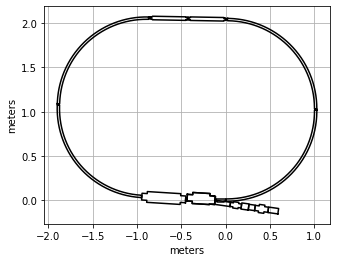

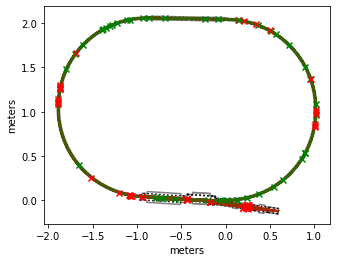

In [49]:
model=StorageRingModel(lattice_ring,lattice_injector,use_energy_correction=True)

In [9]:
%matplotlib inline
from helper_tools import parallel_evaluate
def shifted_Swarm_Cost(loadingShift):
    try:
        PTL_Injector_Long=make_Injector_With_Longer_First_Drift(loadingShift)
    except:
        return 1.0,0.0
    optimizer = StorageRingModel(lattice_ring, PTL_Injector_Long)
    return optimizer.mode_match(True) #(0.6319767830742709, 5.7820389531454275)
shifts=np.linspace(-.03,.03,9)
results=parallel_evaluate(shifted_Swarm_Cost,shifts,processes=len(shifts))

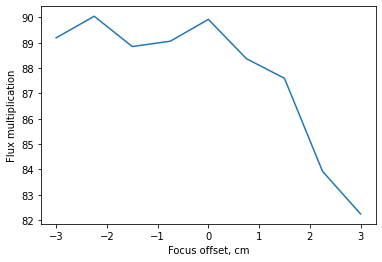

In [12]:
y=[res[1] for res in results]
plt.plot(shifts*100,y)
plt.xlabel("Focus offset, cm")
plt.ylabel("Flux multiplication")
plt.show()

In [65]:
from latticeModels_Parameters import injectorParamsOptimalAny
gap0=injectorParamsOptimalAny["gap1"]

def shifted(delta):
    injectorParamsOptimalAny.super_special_change_item("gap1",gap0+delta)
    lattice_ring, lattice_injector = make_Ring_And_Injector_Version3(params)
    optimizer = StorageRingModel(lattice_ring, lattice_injector)
    return optimizer.mode_match(True)
shifts=np.linspace(-.03,.03,5)
results=parallel_evaluate(shifted,shifts,processes=len(shifts))
injectorParamsOptimalAny.super_special_change_item("gap1",gap0)

In [66]:
results

[(0.7515676046473709, 78.06278088384927),
 (0.7710486067024354, 71.94143268904661),
 (0.7916690485230207, 65.46204810925506),
 (0.80718621273004, 60.58622268515165),
 (0.8313210236361606, 53.00254804898593)]

In [35]:
from optimizer import Solver
from helper_tools import *
from parallel_Gradient_Descent import gradient_Descent
def solve(x):
    solver=Solver('both',None,use_energy_correction=True)
    sol=solver.solve(x)
    return sol.cost

0.01884943975425587

In [38]:
max((1,2,'a'))

TypeError: '>' not supported between instances of 'str' and 'int'

In [23]:
a=np.zeros((7,3))
a[1,1]=2.0
a[5,1]=3.0
display(a)

valid_indices=a[:,1]!=0.0 #avoid using == with float unless you're sure you can!
display(a[valid_indices])

array([[0., 0., 0.],
       [0., 2., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

array([[0., 2., 0.]])

In [34]:
x=np.linspace(0.0,.004,2)
y=np.linspace(0.0,2.0, 3)
X,Y=np.meshgrid(x,y)
display(x)
display(X)
display(y)
display(Y)

array([0.   , 0.004])

array([[0.   , 0.004],
       [0.   , 0.004],
       [0.   , 0.004]])

array([0., 1., 2.])

array([[0., 0.],
       [1., 1.],
       [2., 2.]])

array([0., 0., 1., 0., 1., 2.])

In [ ]:
swarm_injector_traced.particles[5].el_phase_space_log[-1][0]

In [ ]:
# PTL = ParticleTracerLattice(200.0, lattice_type='storage_ring')
#
# PTL.add_halbach_lens_sim(.01, .5)
# PTL.add_drift(.1)
# PTL.add_combiner_sim_lens(.1, .02)
# PTL.add_halbach_lens_sim(.01, .5)
# PTL.add_segmented_halbach_bender(.0254 / 2, .01, None, 1, 0.0, r_offset_fact=1.)
# PTL.add_halbach_lens_sim(.01, 1., constrain=True)
# PTL.add_segmented_halbach_bender(.0254 / 2, .01, None, 1, 0.0, r_offset_fact=1.)
# PTL.end_lattice(enforceClosedLattice=False, constrain=True,surpressWarning=True)

In [ ]:
def get_Error(fact):
    PTL = ParticleTracerLattice(200.0, lattice_type='storage_ring')


    PTL.add_drift(.1)
    PTL.add_segmented_halbach_bender(.0254 / 2, .01, 300, 1, 0.0, r_offset_fact=fact)
    PTL.end_lattice(enforceClosedLattice=False, constrain=False,surpressWarning=True)

    from particle_tracer import ParticleTracer
    from particle_class import Particle
    pt=ParticleTracer(PTL)
    particle=Particle(qi=np.array([-1e-10,-.1e-3,0.0]))

    particle=pt.trace(particle,1e-5,.01,use_fast_mode=False,accelerated=False)
    PTL.show_lattice(particle=particle,show_trace_lines=True,true_aspect_ratio=False)
    particle.plot_orbit_reference_frame_position()
    particle.plot_energies(show_only_total_energy=True)
    error=np.std([q[1] for q in particle.qo_vals])
    return error #0.0003401014791188453
# offsetList=list(np.linspace(.95,1.1,10))
# errors=[get_Error(offset) for offset in offsetList]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(offsetList,errors)
plt.show()

In [ ]:

PTL = ParticleTracerLattice(200.0, lattice_type='storage_ring')
PTL.add_drift(.1)
PTL.add_combiner_sim_lens(.15,.04)
# PTL.add_halbach_lens_sim(.02,.1,.9)
# PTL.add_drift(.1)
# PTL.add_segmented_halbach_bender(.0254 / 2, .01, 300, 1, 0.0)
PTL.end_lattice(enforceClosedLattice=False, constrain=False,surpressWarning=True)
from particle_tracer import ParticleTracer
from particle_class import Particle
pt=ParticleTracer(PTL)
particle=Particle(qi=np.array([-1e-10,2e-3,0.0]))
particle=pt.trace(particle,1e-5,.01,use_fast_mode=False,accelerated=False)
%matplotlib inline
PTL.show_lattice(particle=particle,show_trace_lines=True,true_aspect_ratio=False)



In [ ]:
PTL.el_list[1].force(np.array([.1,0,0]))
PTL.el_list[1].r2

In [ ]:
[q[1] for q in particle.qo_vals]

In [ ]:
particle.plot_orbit_reference_frame_position()

In [ ]:
%matplotlib inline
from storageRingGeometries import Line,Kink,CappedSlicedBend
from storageRingGeometry import StorageRingGeometry
from storageRingGeometrySolver import StorageRingConstraintSolver
first_el=Line(.5)
first_el.place(np.array([0.0,0.0]),-np.pi)
L_cap=0.02135#PTL_True.bender1.L_cap



elements=[
    first_el,
    Line(.1),
    Kink(-0.07288109082330438,L2,L1),
    Line(.5),
    CappedSlicedBend(.0127,240,magnet_depth,L_cap,1.),
    Line(1.5,constrained=True),
    CappedSlicedBend(.0127,230,magnet_depth,L_cap,1.0042770601252802)
]



storage_ring=StorageRingGeometry(elements)
storage_ring.build()
storage_ring.show_geometry()
solver=StorageRingConstraintSolver(storage_ring,1.0)
params=solver.solve()
solver.update_ring(params)
storage_ring=solver.storage_ring
# storage_ring=solver.make_valid_storage_ring()
storage_ring.show_geometry()
params

In [ ]:
import matplotlib.pyplot as plt
def build(PTL,storage_ring):
    #todo: assert that each element lines up as expected
    for i,elements in enumerate(zip(PTL.el_list,storage_ring)):
        el_PTL,el_Geom=elements
        if type(el_Geom) is Line:
            el_PTL.r1=np.array([*el_Geom.pos_in,0])
            el_PTL.r2=np.array([*el_Geom.pos_out,0])
            el_PTL.nb=np.array([*el_Geom.norm_in,0])
            el_PTL.ne=np.array([*el_Geom.norm_out,0])

            theta=np.arctan2(el_Geom.norm_out[1],el_Geom.norm_out[0])
            if theta<0:
                theta+=np.pi*2
            el_PTL.theta=theta
            el_PTL.R_Out = np.asarray([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
            el_PTL.R_In = np.asarray([[np.cos(-theta), -np.sin(-theta)], [np.sin(-theta), np.cos(-theta)]])
        if type(el_Geom) is Kink:

            n_out_perp=-np.flip(el_Geom.norm_out)*np.array([-1,1])
            # r2+
            r2=(el_Geom.pos_out+n_out_perp*el_PTL.output_offset)
            el_PTL.r2=np.array([*r2,0.0])
            el_PTL.r2[1]=0.014609633588606709

            r1=r2+-el_Geom.norm_out*el_PTL.Lb+el_Geom.norm_in*el_PTL.La
            el_PTL.r1=np.array([*r1,0])

            el_PTL.nb=np.array([*el_Geom.norm_in,0])
            el_PTL.ne=np.array([*el_Geom.norm_out,0])

            theta=np.arctan2(el_Geom.norm_out[1],el_Geom.norm_out[0])-np.pi #todo: i think this might be wrong, or not the right way to hink about it

            theta=theta+2*np.pi #conventino
            el_PTL.theta=theta

            rot=el_PTL.theta
            el_PTL.R_Out = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]]) #the rotation matrix for
            rot=-rot
            el_PTL.R_In = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]])#np.linalg.inv(el_PTL.R_Out)
        if type(el_Geom) is CappedSlicedBend:
            print("need to include shifting this over for offset effect")

            el_PTL.r1=np.array([*el_Geom.pos_in,0])
            el_PTL.r2=np.array([*el_Geom.pos_out,0])
            el_PTL.nb=np.array([*el_Geom.norm_in,0])
            el_PTL.ne=np.array([*el_Geom.norm_out,0])
            el_PTL.r0=np.array([*el_Geom.benderCenter,0])
            # print(el_PTL.r1)
            n=-el_Geom.norm_in
            theta=np.arctan2(n[1],n[0])
            if theta<0:
                theta+=np.pi*2
            print(n,theta)
            el_PTL.theta=theta

            rot=el_PTL.theta- el_PTL.ang + np.pi / 2
            el_PTL.R_Out = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]]) #the rotation matrix for
            rot=-rot
            el_PTL.R_In = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]])#np.linalg.inv(el_PTL.R_Out)

build(PTL,storage_ring)
# %matplotlib tk
PTL.make_Geometry()
PTL.show_lattice(true_aspect_ratio=True)

In [ ]:
%matplotlib inline
from particle_tracer import ParticleTracer
from particle_class import Particle
pt=ParticleTracer(PTL)
particle=Particle(qi=np.array([-1e-10,-.1e-3,0.0]))

particle=pt.trace(particle,1e-5,1,use_fast_mode=False,accelerated=False)
PTL.show_lattice(particle=particle,show_trace_lines=True,true_aspect_ratio=False)
np.set_printoptions(precision=100)
print(particle.qf) #[-7.3317516263831284e-01  3.4424809584164646e-03 -5.2940775338183833e-06]

In [ ]:
particle.plot_orbit_reference_frame_position()

In [ ]:
el=PTL.el_list[-1]
q=np.array([.5,.5,0])
# print(el.r1,el.r2)
# print(el.R_Out)
# print(el.r2)
# print(el.transform_element_coords_into_lab_frame(q))
# print(el.R_Out)#@q[:2])#+el.r1[:2])
print(el.R_Out)
print(el.R_In)

In [ ]:
PTL_Compare = ParticleTracerLattice(200.0, lattice_type='storage_ring')


PTL_Compare.add_halbach_lens_sim(.01, .5)
PTL_Compare.add_combiner_sim_lens(.1, .02)
PTL_Compare.add_halbach_lens_sim(.01, .5)
PTL_Compare.add_segmented_halbach_bender(.0254 / 2, .01, 251, 1.0419898531028318, 0.0, r_offset_fact=1.)
PTL_Compare.add_halbach_lens_sim(.01, 1.1156855236430039, constrain=True)
PTL_Compare.add_segmented_halbach_bender(.0254 / 2, .01, 251, 1.0418702761406033, 0.0, r_offset_fact=1.)
PTL_Compare.end_lattice(enforceClosedLattice=True, constrain=True,surpressWarning=True)


In [ ]:
PTL_Compare.bender1.rb,PTL_Compare.bender2.rb,PTL_Compare.bender1.num_magnets,PTL_Compare.bender2.num_magnets

In [ ]:
el=PTL_Compare.el_list[-1]
q=np.array([.5,.5,0])
# print(el.r1,el.r2)
# print(el.R_Out)
# print(el.r2)
# print(el.transform_element_coords_into_lab_frame(q))
# print(el.R_Out)#@q[:2])#+el.r1[:2])
print(el.R_Out)
print(el.R_In)


In [ ]:
from particle_tracer import ParticleTracer
from particle_class import Particle
pt=ParticleTracer(PTL_Compare)
particle=Particle(qi=np.array([-1e-10,-1e-3,0.0]))

particle=pt.trace(particle,1e-5,1,use_fast_mode=False,accelerated=False)
PTL_Compare.show_lattice(particle=particle,show_trace_lines=True,true_aspect_ratio=False)
np.set_printoptions(precision=100)
print(particle.qf) #[-6.287784633004588e-01 -3.911591601543401e-03 -4.206831835417686e-06]

In [ ]:
particle.plot_orbit_reference_frame_position()

In [ ]:
#set first element
PTL.el_list[0].r1=storage_ring.elements[0].pos_in
PTL.el_list[0].r2=storage_ring.elements[0].pos_out
n=storage_ring.elements[0].norm_out
theta=np.arctan2(n[1],n[0])
PTL.el_list[0].theta=theta
rot=theta
PTL.el_list[0].R_Out = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]]) #the rotation matrix for
#rotating out of the element reference frame

In [ ]:
#set combiner
combEl=PTL.el_list[1]
combShape=storage_ring.elements[1]
n_out_perp=-np.flip(combShape.norm_out)*np.array([-1,1])
# r2+
r2=(combShape.pos_out+n_out_perp*combEl.output_offset)
combEl.r2=np.array([r2[0],r2[1],0.0])

r1=r2+-combShape.norm_out*combEl.Lb+combShape.norm_in*combEl.La
combEl.r1=np.array([r1[0],r1[1],0])

theta=PTL.el_list[0].theta
theta = 2 * np.pi - combEl.ang - (
        np.pi - theta)  # Tilt the combiner down by el.ang so y=0 is perpindicular
# to the input. Rotate it 1 whole revolution, then back it off by the difference. Need to subtract
# np.pi because the combiner's input is not at the origin, but faces 'east'
theta = theta - 2 * np.pi * (theta // (2 * np.pi))  # the above logic can cause the element
# to have to rotate more than 360 deg


combEl.theta=theta

rot=combEl.theta
combEl.R_Out = np.asarray([[np.cos(rot), -np.sin(rot)], [np.sin(rot), np.cos(rot)]]) #the rotation matrix for
#rotating out of the element reference frame
theta,combEl.ang

In [ ]:
PTL.make_Geometry()

In [ ]:
%matplotlib tk
PTL.show_lattice()

In [11]:
from numba_stats import norm
norm.pdf(0.0,0.0,10.0)

array(0.03989423)

In [ ]:
from swarm_tracer import SwarmTracer
st=SwarmTracer(PTL_True)
swarm=st.initalize_pseudorandom_swarm_in_phase_space(5e-3,5.0,1.0,1000)
swarm=st.trace_swarm_through_lattice(swarm,5e-6,1,use_fast_mode=True)

In [38]:
from helper_tools import *
from constants import *
rp=.6
T=.01
vRel=1e2*np.sqrt(16 * BOLTZMANN_CONSTANT*T/(3.14 *MASS_LITHIUM_7))
sigma=5e-13
v=210*1e2
Flux=2e12*500
A=np.pi*(.7*rp)**2
I=Flux/A
n=I/v
l=1/(np.sqrt(2)*n*sigma)
vRel/l

47.21549651412601

In [42]:
float_Kelvin=float
float_meters=float
def scattering_Rate(T: float_Kelvin,rp: float_meters):
    assert rp<.1 and T<.1 #reasonable values
    rp*=1e2 #convert to cm
    vRel=1e2*np.sqrt(16 * BOLTZMANN_CONSTANT*T/(3.14 *MASS_LITHIUM_7)) #cm/s
    sigma=5e-13 #cm^2
    speed=210*1e2 #cm^2
    flux=2e12*500 #1/s
    area=np.pi*(.7*rp)**2 #cm
    n=flux/(area*speed) #1/cm^3
    meanFreePath=1/(np.sqrt(2)*n*sigma)
    return vRel/meanFreePath
scattering_Rate(.01,.01)

16.997578745085367

In [90]:
import numba
from numba.experimental import jitclass
@jitclass([('a',numba.types.unicode_type),
           ('b',numba.float64),
           ('c',numba.int64)])
class poop:
    def __init__(self):
        self.a='a'
        self.b=2.0
        self.c=3

poo=poop()
%timeit poop()

2.63 µs ± 38.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


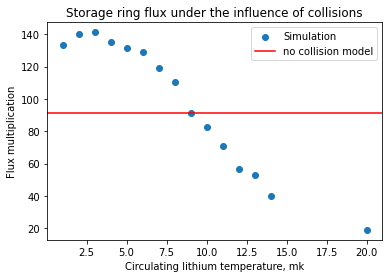

In [103]:
res=[133.12747755802948, 140.27885009841324, 141.22793660956452, 135.4874919947779, 131.72251599032012, 129.17155980008903, 119.28016157792038, 110.6190413848261, 91.54714335716547, 82.63165617539292, 70.64025870944323, 56.4425280821248, 52.62536289967612, 40.19285010371332, 18.948608342594255]

T_arr=np.arange(0.001,.015,.001)
T_arr=1e3*np.append(T_arr,.02)
plt.scatter(T_arr,res,label='Simulation')
plt.title("Storage ring flux under the influence of collisions")
plt.ylabel("Flux multiplication")
plt.xlabel("Circulating lithium temperature, mk")
plt.axhline(y=91,c='r',label='no collision model')
plt.legend()
plt.show()

In [69]:
@numba.njit
def mixed_value_type_str_key_dict():
    # str -> mixed types, including array and typed dictionary!
    a = {'a': 1, 'b': 'string', 'c': np.arange(5), 'd': {10:20, 30:40}}

    print('getitem', a['d']) # getitem works
    [print("key", k) for k in a.keys()] # keys() works
    print('len', len(a)) # non-mutating call on the dictionary is ok
    print("contains ", 'a' in a, 'z' in a) # and contains as it's read only
    # it's slightly contrived, but .items() also works


mixed_value_type_str_key_dict()

getitem {10: 20, 30: 40}
key a
key b
key c
key d
len 4
contains  True False


In [123]:
def full_arctan2(q):
    """Compute angle spanning 0 to 2pi degrees as expected from x and y where q=numpy.array([x,y,z])"""
    phi = np.arctan2(q[1], q[0])
    if phi < 0:  # confine phi to be between 0 and 2pi
        phi += 2 * np.pi
    return phi

In [76]:
#values
s0=210.0
T=.01

In [170]:
# lens

rp=.02
q_el=np.array([.2,rp/3,-rp/2])
x,y,z=q_el

sigma=np.sqrt(BOLTZMANN_CONSTANT*T/MASS_LITHIUM_7)
FWHM=2.355*sigma
trapFactY=(1-(y/rp)**2)
trapFactZ=(1-(z/rp)**2)
assert trapFactZ>=0.0 and trapFactY>=0.0
delta_px,py,pz=FWHM*2*(np.random.random_sample(3)-.5)
py,pz=py*trapFactY,pz*trapFactZ
px=s0+delta_px
pCollision=(px,py,pz)
pCollision

(205.89436883373398, 4.881527298918776, -0.19991783017430087)

In [171]:

theta=1.215
rp=.02
ro=1.01
r=1.011
x,y=r*np.cos(theta),r*np.sin(theta)
z=rp/5.0
q_el=np.array([x,y,z])


In [197]:

#bender
theta=full_arctan2(q_el)
r=np.sqrt(x**2+y**2)
xo=r-ro
yo=q_el[2]
trapFactXo=(1-(xo/rp)**2) if xo<=rp else 0.0
trapFactYo=(1-(yo/rp)**2)
assert all(0.0<=fact<=1.0 for fact in (trapFactYo,trapFactXo))
L=s0*ro
delta_pso,pxo,pyo=FWHM*2*(np.random.random_sample(3)-.5)
pso=L/r+delta_pso
pCollision=np.array([pso,pxo,pyo])



array([208.82260908,   6.50248248,  -2.19312246])

In [175]:
l=s0*r
l/(r+rp),s0


(205.9262851600388, 210.0)